*Note*: following content is modified version of from Rick Muller's original content [notebook](http://nbviewer.jupyter.org/gist/rpmuller/5920182), [source](https://gist.github.com/rpmuller/5920182)

# A Crash Course in Python for Scientists
[Rick Muller](http://www.cs.sandia.gov/~rmuller/), Sandia National Laboratories

version 0.6

This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US).

## Why Python?
Python is the programming language of choice for many scientists to a large degree because it offers a great deal of power to analyze and model scientific data with relatively little overhead in terms of learning, installation or development time. It is a language you can pick up in a weekend, and use for the rest of one's life.

The [Python Tutorial](http://docs.python.org/2/tutorial/) is a great place to start getting a feel for the language. To complement this material, I taught a [Python Short Course](http://www.wag.caltech.edu/home/rpm/python_course/) years ago to a group of computational chemists during a time that I was worried the field was moving too much in the direction of using canned software rather than developing one's own methods. I wanted to focus on what working scientists needed to be more productive: parsing output of other programs, building simple models, experimenting with object oriented programming, extending the language with C, and simple GUIs. 

I'm trying to do something very similar here, to cut to the chase and focus on what scientists need. In the last year or so, the [IPython Project](http://ipython.org) has put together a notebook interface that I have found incredibly valuable. A large number of people have released very good IPython Notebooks that I have taken a huge amount of pleasure reading through. Some ones that I particularly like include:

* Rob Johansson's [excellent notebooks](http://jrjohansson.github.io/), including [Scientific Computing with Python](https://github.com/jrjohansson/scientific-python-lectures) and [Computational Quantum Physics with QuTiP](https://github.com/jrjohansson/qutip-lectures) lectures;
* [XKCD style graphs in matplotlib](http://nbviewer.ipython.org/url/jakevdp.github.com/downloads/notebooks/XKCD_plots.ipynb);
* [A collection of Notebooks for using IPython effectively](https://github.com/ipython/ipython/tree/master/examples/notebooks#a-collection-of-notebooks-for-using-ipython-effectively)
* [A gallery of interesting IPython Notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)

I find IPython notebooks an easy way both to get important work done in my everyday job, as well as to communicate what I've done, how I've done it, and why it matters to my coworkers. I find myself endlessly sweeping the [IPython subreddit](http://ipython.reddit.com) hoping someone will post a new notebook. In the interest of putting more notebooks out into the wild for other people to use and enjoy, I thought I would try to recreate some of what I was trying to get across in the original Python Short Course, updated by 15 years of Python, Numpy, Scipy, Matplotlib, and IPython development, as well as my own experience in using Python almost every day of this time.

## What You Need to Install

There are two branches of current releases in Python: the older-syntax Python 2, and the newer-syntax Python 3. This schizophrenia is largely intentional: when it became clear that some non-backwards-compatible changes to the language were necessary, the Python dev-team decided to go through a five-year (or so) transition, during which the new language features would be introduced and the old language was still actively maintained, to make such a transition as easy as possible. We're now (2013) past the halfway point, and, IMHO, at the first time when I'm considering making the change to Python 3.

Nonetheless, I'm going to write these notes with Python 2 in mind, since this is the version of the language that I use in my day-to-day job, and am most comfortable with. If these notes are important and are valuable to people, I'll be happy to rewrite the notes using Python 3.

> *alper's note*: Notebook contents are being upgraded to Python 3

With this in mind, these notes assume you have a Python distribution that includes:

* [Python](http://www.python.org) version 3.6;
* [Numpy](http://www.numpy.org), the core numerical extensions for linear algebra and multidimensional arrays;
* [Scipy](http://www.scipy.org), additional libraries for scientific programming;
* [Matplotlib](http://matplotlib.sf.net), excellent plotting and graphing libraries;
* [IPython](http://ipython.org), with the additional libraries required for the notebook interface.

**Linux** Most distributions have an installation manager. Redhat has yum, Ubuntu has apt-get. To my knowledge, all of these packages should be available through those installers.

**Mac** I use [Macports](http://www.macports.org/), which has up-to-date versions of all of these packages.

**Windows** Please visit [Anaconda](https://www.anaconda.com/) website for instructions on how to install Python and necessary modules in Windows.

**Cloud** This notebook is currently running on the [IPython notebook viewer](http://nbviewer.ipython.org/), 

# I. Python Overview
This is a quick introduction to Python. There are lots of other places to learn the language more thoroughly. I have collected a list of useful links, including ones to other learning resources, at the end of this notebook. If you want a little more depth, [Python Tutorial](http://docs.python.org/2/tutorial/) is a great place to start, as is Zed Shaw's [Learn Python the Hard Way](http://learnpythonthehardway.org/book/).

The lessons that follow make use of the IPython notebooks. There's a good introduction to notebooks [in the IPython notebook documentation](http://ipython.org/notebook.html) that even has a [nice video](http://www.youtube.com/watch?v=H6dLGQw9yFQ#!) on how to use the notebooks. You should probably also flip through the [IPython tutorial](http://ipython.org/ipython-doc/dev/interactive/tutorial.html) in your copious free time.

Briefly, notebooks have code cells (that are generally followed by result cells) and text cells. The text cells are the stuff that you're reading now. The code cells start with "In []:" with some number generally in the brackets. If you put your cursor in the code cell and hit Shift-Enter, the code will run in the Python interpreter and the result will print out in the output cell. You can then change things around and see whether you understand what's going on. If you need to know more, see the [IPython notebook documentation](http://ipython.org/notebook.html) or the [IPython tutorial](http://ipython.org/ipython-doc/dev/interactive/tutorial.html).

## Using Python as a Calculator

Many of the things I used to use a calculator for, I now use Python for:

In [1]:
2+2

4

In [2]:
(50-5*6)/4

5.0

(If you're typing this into an IPython notebook, or otherwise using notebook file, you hit shift-Enter to evaluate a cell.)

There are some gotchas compared to using a normal calculator.

In [3]:
7/3

2.3333333333333335

Python integer division, like C or Fortran integer division, truncates the remainder and returns an integer. At least it does in version 2. In version 3, Python returns a floating point number. You can get a sneak preview of this feature in Python 2 by importing the module from the future features:

    from __future__ import division

In Python 3, integer division is achieved by `//`

In [4]:
7 // 3

2

In the last few lines, we have sped by a lot of things that we should stop for a moment and explore a little more fully. We've seen, however briefly, two different data types: **integers**, also known as *whole numbers* to the non-programming world, and **floating point numbers**, also known (incorrectly) as *decimal numbers* to the rest of the world.

We've also seen the first instance of an **import** statement. Python has a huge number of libraries included with the distribution. To keep things simple, most of these variables and functions are not accessible from a normal Python interactive session. Instead, you have to import the name. For example, there is a **math** module containing many useful functions. To access, say, the square root function, you can either first

    from math import sqrt

and then

In [5]:
sqrt(81)

NameError: name 'sqrt' is not defined

or you can simply import the math library itself

In [6]:
import math
math.sqrt(81)

9.0

You can define variables using the equals (=) sign:

In [7]:
width = 20
length = 30
area = length*width
area

600

If you try to access a variable that you haven't yet defined, you get an error:

In [8]:
volume

NameError: name 'volume' is not defined

and you need to define it:

In [9]:
depth = 10
volume = area*depth
volume

6000

You can name a variable *almost* anything you want. It needs to start with an alphabetical character or "\_", can contain alphanumeric charcters plus underscores ("\_"). Certain words, however, are reserved for the language:

    and, as, assert, break, class, continue, def, del, elif, else, except, 
    exec, finally, for, from, global, if, import, in, is, lambda, not, or,
    pass, print, raise, return, try, while, with, yield

Trying to define a variable using one of these will result in a syntax error:

In [11]:
return = 0

SyntaxError: invalid syntax (<ipython-input-11-c7a05f6eb55e>, line 1)

The [Python Tutorial](http://docs.python.org/2/tutorial/introduction.html#using-python-as-a-calculator) has more on using Python as an interactive shell. The [IPython tutorial](http://ipython.org/ipython-doc/dev/interactive/tutorial.html) makes a nice complement to this, since IPython has a much more sophisticated iteractive shell.

## Strings
Strings are lists of printable characters, and can be defined using either single quotes

In [12]:
'Hello, World!'

'Hello, World!'

or double quotes

In [13]:
"Hello, World!"

'Hello, World!'

But not both at the same time, unless you want one of the symbols to be part of the string.

In [14]:
"He's a Rebel"

"He's a Rebel"

In [15]:
'She asked, "How are you today?"'

'She asked, "How are you today?"'

Just like the other two data objects we're familiar with (ints and floats), you can assign a string to a variable

In [16]:
greeting = "Hello, World!"

The **print** statement is often used for printing character strings:

In [17]:
print(greeting)

Hello, World!


But it can also print data types other than strings:

In [18]:
print("The area is ",area)

The area is  600


In the above snipped, the number 600 (stored in the variable "area") is converted into a string before being printed out.

You can use the + operator to concatenate strings together:

In [19]:
statement = "Hello," + "World!"
print(statement)

Hello,World!


Don't forget the space between the strings, if you want one there. 

In [20]:
statement = "Hello, " + "World!"
print(statement)

Hello, World!


You can use + to concatenate multiple strings in a single statement:

In [21]:
print("This " + "is " + "a " + "longer " + "statement.")

This is a longer statement.


If you have a lot of words to concatenate together, there are other, more efficient ways to do this. But this is fine for linking a few strings together.

## Lists
Very often in a programming language, one wants to keep a group of similar items together. Python does this using a data type called **lists**.

In [22]:
days_of_the_week = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

You can access members of the list using the **index** of that item:

In [23]:
days_of_the_week[2]

'Tuesday'

Python lists, like C, but unlike Fortran, use 0 as the index of the first element of a list. Thus, in this example, the 0 element is "Sunday", 1 is "Monday", and so on. If you need to access the *n*th element from the end of the list, you can use a negative index. For example, the -1 element of a list is the last element:

In [24]:
days_of_the_week[-1]

'Saturday'

You can add additional items to the list using the .append() command:

In [25]:
languages = ["Fortran","C","C++"]
languages.append("Python")
print(languages)

['Fortran', 'C', 'C++', 'Python']


The **range()** command is a convenient way to make sequential lists of numbers:

In [26]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

> In Python 3, `range()` behaves differently. It can feed sequence of numbers to a loop but it cannot behave like a list, thus needs `list()` to view as a list

Note that range(n) starts at 0 and gives the sequential list of integers less than n. If you want to start at a different number, use range(start,stop)

In [27]:
list(range(2,8))

[2, 3, 4, 5, 6, 7]

The lists created above with range have a *step* of 1 between elements. You can also give a fixed step size via a third command:

In [28]:
evens = list(range(0,20,2))
evens

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [29]:
evens[3]

6

Lists do not have to hold the same data type. For example,

In [30]:
["Today",7,99.3,""]

['Today', 7, 99.3, '']

However, it's good (but not essential) to use lists for similar objects that are somehow logically connected. If you want to group different data types together into a composite data object, it's best to use **tuples**, which we will learn about below.

You can find out how long a list is using the **len()** command:

In [31]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [32]:
len(evens)

10

## Iteration, Indentation, and Blocks
One of the most useful things you can do with lists is to *iterate* through them, i.e. to go through each element one at a time. To do this in Python, we use the **for** statement:

In [33]:
for day in days_of_the_week:
    print(day)

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday


This code snippet goes through each element of the list called **days_of_the_week** and assigns it to the variable **day**. It then executes everything in the indented block (in this case only one line of code, the print statement) using those variable assignments. When the program has gone through every element of the list, it exists the block.

(Almost) every programming language defines blocks of code in some way. In Fortran, one uses END statements (ENDDO, ENDIF, etc.) to define code blocks. In C, C++, and Perl, one uses curly braces {} to define these blocks.

Python uses a colon (":"), followed by indentation level to define code blocks. Everything at a higher level of indentation is taken to be in the same block. In the above example the block was only a single line, but we could have had longer blocks as well:

In [34]:
for day in days_of_the_week:
    statement = "Today is " + day
    print(statement)

Today is Sunday
Today is Monday
Today is Tuesday
Today is Wednesday
Today is Thursday
Today is Friday
Today is Saturday


The **range()** command is particularly useful with the **for** statement to execute loops of a specified length:

In [35]:
for i in range(20):
    print("The square of ",i," is ",i*i)

The square of  0  is  0
The square of  1  is  1
The square of  2  is  4
The square of  3  is  9
The square of  4  is  16
The square of  5  is  25
The square of  6  is  36
The square of  7  is  49
The square of  8  is  64
The square of  9  is  81
The square of  10  is  100
The square of  11  is  121
The square of  12  is  144
The square of  13  is  169
The square of  14  is  196
The square of  15  is  225
The square of  16  is  256
The square of  17  is  289
The square of  18  is  324
The square of  19  is  361


## Slicing
Lists and strings have something in common that you might not suspect: they can both be treated as sequences. You already know that you can iterate through the elements of a list. You can also iterate through the letters in a string:

In [36]:
for letter in "Sunday":
    print(letter)

S
u
n
d
a
y


This is only occasionally useful. Slightly more useful is the *slicing* operation, which you can also use on any sequence. We already know that we can use *indexing* to get the first element of a list:

In [37]:
days_of_the_week[0]

'Sunday'

If we want the list containing the first two elements of a list, we can do this via

In [38]:
days_of_the_week[0:2]

['Sunday', 'Monday']

or simply

In [39]:
days_of_the_week[:2]

['Sunday', 'Monday']

If we want the last items of the list, we can do this with negative slicing:

In [40]:
days_of_the_week[-2:]

['Friday', 'Saturday']

which is somewhat logically consistent with negative indices accessing the last elements of the list.

You can do:

In [41]:
workdays = days_of_the_week[1:6]
print(workdays)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']


Since strings are sequences, you can also do this to them:

In [42]:
day = "Sunday"
abbreviation = day[:3]
print(abbreviation)

Sun


If we really want to get fancy, we can pass a third element into the slice, which specifies a step length (just like a third argument to the **range()** function specifies the step):

In [43]:
numbers = list(range(0,40))
evens = numbers[2::2]
evens

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]

Note that in this example I was even able to omit the second argument, so that the slice started at 2, went to the end of the list, and took every second element, to generate the list of even numbers less that 40.

## Booleans and Truth Testing
We have now learned a few data types. We have integers and floating point numbers, strings, and lists to contain them. We have also learned about lists, a container that can hold any data type. We have learned to print things out, and to iterate over items in lists. We will now learn about **boolean** variables that can be either True or False.

We invariably need some concept of *conditions* in programming to control branching behavior, to allow a program to react differently to different situations. If it's Monday, I'll go to work, but if it's Sunday, I'll sleep in. To do this in Python, we use a combination of **boolean** variables, which evaluate to either True or False, and **if** statements, that control branching based on boolean values.

For example:

In [44]:
if day == "Sunday":
    print("Sleep in")
else:
    print("Go to work")

Sleep in


(Quick quiz: why did the snippet print "Go to work" here? What is the variable "day" set to?)

Let's take the snippet apart to see what happened. First, note the statement

In [45]:
day == "Sunday"

True

If we evaluate it by itself, as we just did, we see that it returns a boolean value, False. The "==" operator performs *equality testing*. If the two items are equal, it returns True, otherwise it returns False. In this case, it is comparing two variables, the string "Sunday", and whatever is stored in the variable "day", which, in this case, is the other string "Saturday". Since the two strings are not equal to each other, the truth test has the false value.

The if statement that contains the truth test is followed by a code block (a colon followed by an indented block of code). If the boolean is true, it executes the code in that block. Since it is false in the above example, we don't see that code executed.

The first block of code is followed by an **else** statement, which is executed if nothing else in the above if statement is true. Since the value was false, this code is executed, which is why we see "Go to work".

You can compare any data types in Python:

In [46]:
1 == 2

False

In [47]:
50 == 2*25

True

In [48]:
3 < 3.14159

True

In [49]:
1 == 1.0

True

In [50]:
1 != 0

True

In [51]:
1 <= 2

True

In [52]:
1 >= 1

True

We see a few other boolean operators here, all of which which should be self-explanatory. Less than, equality, non-equality, and so on.

Particularly interesting is the 1 == 1.0 test, which is true, since even though the two objects are different data types (integer and floating point number), they have the same *value*. There is another boolean operator **is**, that tests whether two objects are the same object:

In [53]:
1 is 1.0

False

We can do boolean tests on lists as well:

In [54]:
[1,2,3] == [1,2,4]

False

In [55]:
[1,2,3] < [1,2,4]

True

Finally, note that you can also string multiple comparisons together, which can result in very intuitive tests:

In [56]:
hours = 5
0 < hours < 24

True

If statements can have **elif** parts ("else if"), in addition to if/else parts. For example:

In [57]:
if day == "Sunday":
    print("Sleep in")
elif day == "Saturday":
    print("Do chores")
else:
    print("Go to work")

Sleep in


Of course we can combine if statements with for loops, to make a snippet that is almost interesting:

In [58]:
for day in days_of_the_week:
    statement = "Today is " + day
    print(statement)
    if day == "Sunday":
        print("   Sleep in")
    elif day == "Saturday":
        print("   Do chores")
    else:
        print("   Go to work")

Today is Sunday
   Sleep in
Today is Monday
   Go to work
Today is Tuesday
   Go to work
Today is Wednesday
   Go to work
Today is Thursday
   Go to work
Today is Friday
   Go to work
Today is Saturday
   Do chores


This is something of an advanced topic, but ordinary data types have boolean values associated with them, and, indeed, in early versions of Python there was not a separate boolean object. Essentially, anything that was a 0 value (the integer or floating point 0, an empty string "", or an empty list []) was False, and everything else was true. You can see the boolean value of any data object using the **bool()** function.

In [59]:
bool(1)

True

In [60]:
bool(0)

False

In [61]:
bool(["This "," is "," a "," list"])

True

## Code Example: The Fibonacci Sequence
The [Fibonacci sequence](http://en.wikipedia.org/wiki/Fibonacci_number) is a sequence in math that starts with 0 and 1, and then each successive entry is the sum of the previous two. Thus, the sequence goes 0,1,1,2,3,5,8,13,21,34,55,89,...

A very common exercise in programming books is to compute the Fibonacci sequence up to some number **n**. First I'll show the code, then I'll discuss what it is doing.

In [62]:
n = 10
sequence = [0,1]
for i in range(2,n): # This is going to be a problem if we ever set n <= 2!
    sequence.append(sequence[i-1]+sequence[i-2])
print(sequence)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


Let's go through this line by line. First, we define the variable **n** , and set it to the integer 20. n is the length of the sequence we're going to form, and should probably have a better variable name. 

We then create a variable called **sequence**, and initialize it to the list with the integers 0 and 1 in it, the first two elements of the Fibonacci sequence. We have to create these elements "by hand", since the iterative part of the sequence requires two previous elements.

We then have a for loop over the list of integers from 2 (the next element of the list) to **n** (the length of the sequence). 

After the colon, we see a hash tag "#", and then a **comment** that if we had set n to some number less than 2 we would have a problem. Comments in Python start with #, and are good ways to make notes to yourself or to a user of your code explaining why you did what you did. 

Better than the comment here would be to test to make sure the value of **n** is valid, and to complain if it isn't; we'll try this later.

In the body of the loop, we append to the list an integer equal to the sum of the two previous elements of the list.

After exiting the loop (ending the indentation) we then print out the whole list. That's it!

## Functions
We might want to use the Fibonacci snippet with different sequence lengths. We could cut an paste the code into another cell, changing the value of **n**, but it's easier and more useful to make a function out of the code. 

We do this with the **def** statement in Python:

In [63]:
def fibonacci(sequence_length):
    """Return the Fibonacci sequence of length *sequence_length*"""
    sequence = [0,1]
    if sequence_length < 1:
        print("Fibonacci sequence only defined for length 1 or greater")
        return
    if 0 < sequence_length < 3:
        return sequence[:sequence_length]
    for i in range(2,sequence_length): 
        sequence.append(sequence[i-1]+sequence[i-2])
    return sequence

We can now call **fibonacci()** for different sequence_lengths:

In [64]:
fibonacci(2)

[0, 1]

In [65]:
fibonacci(12)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

We've introduced a several new features here. First, note that the function itself is defined as a code block (a colon followed by an indented block). This is the standard way that Python delimits things. Next, note that the first line of the function is a single string enclosed within `"""`. This is called a **docstring**, and is a special kind of comment that is often available to people using the function through the python command line:

In [66]:
help(fibonacci)

Help on function fibonacci in module __main__:

fibonacci(sequence_length)
    Return the Fibonacci sequence of length *sequence_length*



If you define a docstring for all of your functions, it makes it easier for other people to use them, since they can get help on the arguments and return values of the function.

Next, note that rather than putting a comment in about what input values lead to errors, we have some testing of these values, followed by a warning if the value is invalid, and some conditional code to handle special cases.

## Recursion and Factorials
Functions can also call themselves, something that is often called *recursion*. We're going to experiment with recursion by computing the factorial function. The factorial is defined for a positive integer **n** as
    
$$ n! = n(n-1)(n-2)\cdots 1 $$

First, note that we don't need to write a function at all, since this is a function built into the standard math library. Let's use the help function to find out about it:

In [67]:
from math import factorial
help(factorial)

Help on built-in function factorial in module math:

factorial(...)
    factorial(x) -> Integral
    
    Find x!. Raise a ValueError if x is negative or non-integral.



This is clearly what we want.

In [68]:
factorial(20)

2432902008176640000

However, if we did want to write a function ourselves, we could do recursively by noting that

$$ n! = n(n-1)!$$

The program then looks something like:

In [69]:
def fact(n):
    if n <= 0:
        return 1
    return n*fact(n-1)

In [70]:
fact(20)

2432902008176640000

Recursion can be very elegant, and can lead to very simple programs.

> Sep 28, 2018 *python 3 conversion stopped here*

## Two More Data Structures: Tuples and Dictionaries
Before we end the Python overview, I wanted to touch on two more data structures that are very useful (and thus very common) in Python programs.

A **tuple** is a sequence object like a list or a string. It's constructed by grouping a sequence of objects together with commas, either without brackets, or with parentheses:

In [71]:
t = (1,2,'hi',9.0)
t

(1, 2, 'hi', 9.0)

Tuples are like lists, in that you can access the elements using indices:

In [72]:
t[1]

2

However, tuples are *immutable*, you can't append to them or change the elements of them:

In [73]:
t.append(7)

AttributeError: 'tuple' object has no attribute 'append'

In [74]:
t[1]=77

TypeError: 'tuple' object does not support item assignment

Tuples are useful anytime you want to group different pieces of data together in an object, but don't want to create a full-fledged class (see below) for them. For example, let's say you want the Cartesian coordinates of some objects in your program. Tuples are a good way to do this:

In [75]:
('Bob',0.0,21.0)

('Bob', 0.0, 21.0)

Again, it's not a necessary distinction, but one way to distinguish tuples and lists is that tuples are a collection of different things, here a name, and x and y coordinates, whereas a list is a collection of similar things, like if we wanted a list of those coordinates:

In [76]:
positions = [
             ('Bob',0.0,21.0),
             ('Cat',2.5,13.1),
             ('Dog',33.0,1.2)
             ]

Tuples can be used when functions return more than one value. Say we wanted to compute the smallest x- and y-coordinates of the above list of objects. We could write:

In [77]:
def minmax(objects):
    minx = 1e20 # These are set to really big numbers
    miny = 1e20
    for obj in objects:
        name,x,y = obj
        if x < minx: 
            minx = x
        if y < miny:
            miny = y
    return minx,miny

x,y = minmax(positions)
print(x,y)

0.0 1.2


Here we did two things with tuples you haven't seen before. First, we unpacked an object into a set of named variables using *tuple assignment*:

    >>> name,x,y = obj

We also returned multiple values (minx,miny), which were then assigned to two other variables (x,y), again by tuple assignment. This makes what would have been complicated code in C++ rather simple.

Tuple assignment is also a convenient way to swap variables:

In [78]:
x,y = 1,2
y,x = x,y
x,y

(2, 1)

**Dictionaries** are an object called "mappings" or "associative arrays" in other languages. Whereas a list associates an integer index with a set of objects:

In [79]:
mylist = [1,2,9,21]

The index in a dictionary is called the *key*, and the corresponding dictionary entry is the *value*. A dictionary can use (almost) anything as the key. Whereas lists are formed with square brackets [], dictionaries use curly brackets {}:

In [80]:
ages = {"Rick": 46, "Bob": 86, "Fred": 21}
print("Rick's age is ",ages["Rick"])

Rick's age is  46


There's also a convenient way to create dictionaries without having to quote the keys.

In [81]:
dict(Rick=46,Bob=86,Fred=20)

{'Rick': 46, 'Bob': 86, 'Fred': 20}

The **len()** command works on both tuples and dictionaries:

In [82]:
len(t)

4

In [83]:
len(ages)

3

## Plotting with Matplotlib
We can generally understand trends in data by using a plotting program to chart it. Python has a wonderful plotting library called [Matplotlib](http://matplotlib.sf.net). The IPython notebook interface we are using for these notes has that functionality built in.

As an example, we have looked at two different functions, the Fibonacci function, and the factorial function, both of which grow faster than polynomially. Which one grows the fastest? Let's plot them. First, let's generate the Fibonacci sequence of length 20:

In [84]:
fibs = fibonacci(10)

Next lets generate the factorials.

In [85]:
facts = []
for i in range(10):
    facts.append(factorial(i))

Now we use the Matplotlib function **plot** to compare the two.

In [86]:
import matplotlib.pyplot as plt
plt.plot(facts,label="factorial")
plt.plot(fibs,label="Fibonacci")
plt.xlabel("n")
plt.legend()

The factorial function grows much faster. In fact, you can't even see the Fibonacci sequence. It's not entirely surprising: a function where we multiply by n each iteration is bound to grow faster than one where we add (roughly) n each iteration.

Let's plot these on a semilog plot so we can see them both a little more clearly:

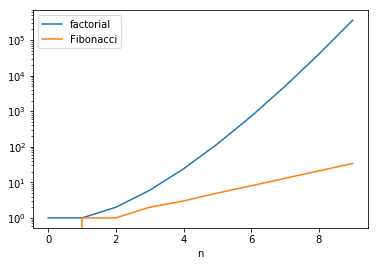

In [87]:
plt.semilogy(facts,label="factorial")
plt.semilogy(fibs,label="Fibonacci")
plt.xlabel("n")
plt.legend()

There are many more things you can do with Matplotlib. We'll be looking at some of them in the sections to come. In the meantime, if you want an idea of the different things you can do, look at the Matplotlib [Gallery](http://matplotlib.org/gallery.html). Rob Johansson's IPython notebook [Introduction to Matplotlib](http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb) is also particularly good.

## Conclusion of the Python Overview
There is, of course, much more to the language than I've covered here. I've tried to keep this brief enough so that you can jump in and start using Python to simplify your life and work. My own experience in learning new things is that the information doesn't "stick" unless you try and use it for something in real life.

You will no doubt need to learn more as you go. I've listed several other good references, including the [Python Tutorial](http://docs.python.org/2/tutorial/) and [Learn Python the Hard Way](http://learnpythonthehardway.org/book/). Additionally, now is a good time to start familiarizing yourself with the [Python Documentation](http://docs.python.org/2.7/), and, in particular, the [Python Language Reference](http://docs.python.org/2.7/reference/index.html).

Tim Peters, one of the earliest and most prolific Python contributors, wrote the "Zen of Python", which can be accessed via the "import this" command:

In [88]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


No matter how experienced a programmer you are, these are words to meditate on.

# II. Numpy and Scipy

[Numpy](http://numpy.org) contains core routines for doing fast vector, matrix, and linear algebra-type operations in Python. [Scipy](http://scipy) contains additional routines for optimization, special functions, and so on. Both contain modules written in C and Fortran so that they're as fast as possible. Together, they give Python roughly the same capability that the [Matlab](http://www.mathworks.com/products/matlab/) program offers. (In fact, if you're an experienced Matlab user, there a [guide to Numpy for Matlab users](http://www.scipy.org/NumPy_for_Matlab_Users) just for you.)

## Making vectors and matrices
Fundamental to both Numpy and Scipy is the ability to work with vectors and matrices. You can create vectors from lists using the **array** command:

In [89]:
import numpy as np
np.array([1,2,3,4,5,6])

array([1, 2, 3, 4, 5, 6])

You can pass in a second argument to **array** that gives the numeric type. There are a number of types [listed here](http://docs.scipy.org/doc/numpy/user/basics.types.html) that your matrix can be. Some of these are aliased to single character codes. The most common ones are 'd' (double precision floating point number), 'D' (double precision complex number), and 'i' (int32). Thus,

In [90]:
np.array([1,2,3,4,5,6],'d')

array([1., 2., 3., 4., 5., 6.])

In [91]:
np.array([1,2,3,4,5,6],'D')

array([1.+0.j, 2.+0.j, 3.+0.j, 4.+0.j, 5.+0.j, 6.+0.j])

In [92]:
np.array([1,2,3,4,5,6],'i')

array([1, 2, 3, 4, 5, 6], dtype=int32)

To build matrices, you can either use the array command with lists of lists:

In [93]:
np.array([[0,1],[1,0]],'d')

array([[0., 1.],
       [1., 0.]])

You can also form empty (zero) matrices of arbitrary shape (including vectors, which Numpy treats as vectors with one row), using the **zeros** command:

In [94]:
np.zeros((3,3),'d')

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

The first argument is a tuple containing the shape of the matrix, and the second is the data type argument, which follows the same conventions as in the array command. Thus, you can make row vectors:

In [95]:
np.zeros(3,'d')

array([0., 0., 0.])

In [96]:
np.zeros((1,3),'d')

array([[0., 0., 0.]])

or column vectors:

In [97]:
np.zeros((3,1),'d')

array([[0.],
       [0.],
       [0.]])

There's also an **identity** command that behaves as you'd expect:

In [98]:
np.identity(4,'d')

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

as well as a **ones** command.

## Linspace, matrix functions, and plotting
The **linspace** command makes a linear array of points from a starting to an ending value.

In [99]:
np.linspace(0,1)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

If you provide a third argument, it takes that as the number of points in the space. If you don't provide the argument, it gives a length 50 linear space.

In [100]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

**linspace** is an easy way to make coordinates for plotting. Functions in the numpy library (all of which are imported into IPython notebook) can act on an entire vector (or even a matrix) of points at once. Thus,

In [101]:
from math import pi
x = np.linspace(0,2*pi)
np.sin(x)

array([ 0.00000000e+00,  1.27877162e-01,  2.53654584e-01,  3.75267005e-01,
        4.90717552e-01,  5.98110530e-01,  6.95682551e-01,  7.81831482e-01,
        8.55142763e-01,  9.14412623e-01,  9.58667853e-01,  9.87181783e-01,
        9.99486216e-01,  9.95379113e-01,  9.74927912e-01,  9.38468422e-01,
        8.86599306e-01,  8.20172255e-01,  7.40277997e-01,  6.48228395e-01,
        5.45534901e-01,  4.33883739e-01,  3.15108218e-01,  1.91158629e-01,
        6.40702200e-02, -6.40702200e-02, -1.91158629e-01, -3.15108218e-01,
       -4.33883739e-01, -5.45534901e-01, -6.48228395e-01, -7.40277997e-01,
       -8.20172255e-01, -8.86599306e-01, -9.38468422e-01, -9.74927912e-01,
       -9.95379113e-01, -9.99486216e-01, -9.87181783e-01, -9.58667853e-01,
       -9.14412623e-01, -8.55142763e-01, -7.81831482e-01, -6.95682551e-01,
       -5.98110530e-01, -4.90717552e-01, -3.75267005e-01, -2.53654584e-01,
       -1.27877162e-01, -2.44929360e-16])

In conjunction with **matplotlib**, this is a nice way to plot things:

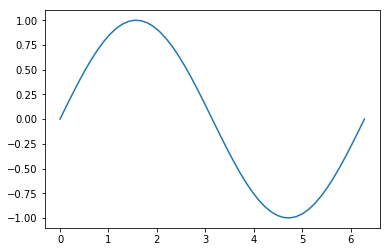

In [102]:
plt.plot(x,np.sin(x))

## Matrix operations
Matrix objects act sensibly when multiplied by scalars:

In [103]:
0.125*np.identity(3,'d')

array([[0.125, 0.   , 0.   ],
       [0.   , 0.125, 0.   ],
       [0.   , 0.   , 0.125]])

as well as when you add two matrices together. (However, the matrices have to be the same shape.)

In [104]:
np.identity(2,'d') + np.array([[1,1],[1,2]])

array([[2., 1.],
       [1., 3.]])

Something that confuses Matlab users is that the times (*) operator give element-wise multiplication rather than matrix multiplication:

In [105]:
np.identity(2)*np.ones((2,2))

array([[1., 0.],
       [0., 1.]])

To get matrix multiplication, you need the **dot** command:

In [106]:
np.dot(np.identity(2),np.ones((2,2)))

array([[1., 1.],
       [1., 1.]])

**dot** can also do dot products (duh!):

In [107]:
v = np.array([3,4],'d')
np.sqrt(np.dot(v,v))

5.0

as well as matrix-vector products.

There are **determinant**, **inverse**, and **transpose** functions that act as you would suppose. Transpose can be abbreviated with ".T" at the end of a matrix object:

In [108]:
m = np.array([[1,2],[3,4]])
m.T

array([[1, 3],
       [2, 4]])

There's also a **diag()** function that takes a list or a vector and puts it along the diagonal of a square matrix. 

In [109]:
np.diag([1,2,3,4,5])

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

We'll find this useful later on.

## Matrix Solvers
You can solve systems of linear equations using the **solve** command:

In [110]:
A = np.array([[1,1,1],[0,2,5],[2,5,-1]])
b = np.array([6,-4,27])
np.linalg.solve(A,b)

array([ 5.,  3., -2.])

There are a number of routines to compute eigenvalues and eigenvectors

* **eigvals** returns the eigenvalues of a matrix
* **eigvalsh** returns the eigenvalues of a Hermitian matrix
* **eig** returns the eigenvalues and eigenvectors of a matrix
* **eigh** returns the eigenvalues and eigenvectors of a Hermitian matrix.

In [111]:
A = np.array([[13,-4],[-4,7]],'d')
np.linalg.eigvalsh(A)

array([ 5., 15.])

In [112]:
np.linalg.eigh(A)

(array([ 5., 15.]), array([[-0.4472136 , -0.89442719],
        [-0.89442719,  0.4472136 ]]))

## Example: Finite Differences
Now that we have these tools in our toolbox, we can start to do some cool stuff with it. Many of the equations we want to solve in Physics involve differential equations. We want to be able to compute the derivative of functions:

$$ y' = \frac{y(x+h)-y(x)}{h} $$

by *discretizing* the function $y(x)$ on an evenly spaced set of points $x_0, x_1, \dots, x_n$, yielding $y_0, y_1, \dots, y_n$. Using the discretization, we can approximate the derivative by

$$ y_i' \approx \frac{y_{i+1}-y_{i-1}}{x_{i+1}-x_{i-1}} $$

We can write a derivative function in Python via

In [113]:
def nderiv(y,x):
    "Finite difference derivative of the function f"
    n = len(y)
    d = np.zeros(n,'d') # assume double
    # Use centered differences for the interior points, one-sided differences for the ends
    for i in range(1,n-1):
        d[i] = (y[i+1]-y[i-1])/(x[i+1]-x[i-1])
    d[0] = (y[1]-y[0])/(x[1]-x[0])
    d[n-1] = (y[n-1]-y[n-2])/(x[n-1]-x[n-2])
    return d

Let's see whether this works for our sin example from above:

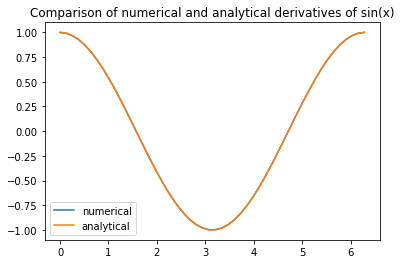

In [114]:
x = np.linspace(0,2*pi)
dsin = nderiv(np.sin(x),x)
plt.plot(x,dsin,label='numerical')
plt.plot(x,np.cos(x),label='analytical')
plt.title("Comparison of numerical and analytical derivatives of sin(x)")
plt.legend()

Pretty close!

## One-Dimensional Harmonic Oscillator using Finite Difference
Now that we've convinced ourselves that finite differences aren't a terrible approximation, let's see if we can use this to solve the one-dimensional harmonic oscillator.

We want to solve the time-independent Schrodinger equation

$$ -\frac{\hbar^2}{2m}\frac{\partial^2\psi(x)}{\partial x^2} + V(x)\psi(x) = E\psi(x)$$

for $\psi(x)$ when $V(x)=\frac{1}{2}m\omega^2x^2$ is the harmonic oscillator potential. We're going to use the standard trick to transform the differential equation into a matrix equation by multiplying both sides by $\psi^*(x)$ and integrating over $x$. This yields

$$ -\frac{\hbar}{2m}\int\psi(x)\frac{\partial^2}{\partial x^2}\psi(x)dx + \int\psi(x)V(x)\psi(x)dx = E$$

We will again use the finite difference approximation. The finite difference formula for the second derivative is

$$ y'' = \frac{y_{i+1}-2y_i+y_{i-1}}{x_{i+1}-x_{i-1}} $$

We can think of the first term in the Schrodinger equation as the overlap of the wave function $\psi(x)$ with the second derivative of the wave function $\frac{\partial^2}{\partial x^2}\psi(x)$. Given the above expression for the second derivative, we can see if we take the overlap of the states $y_1,\dots,y_n$ with the second derivative, we will only have three points where the overlap is nonzero, at $y_{i-1}$, $y_i$, and $y_{i+1}$. In matrix form, this leads to the tridiagonal Laplacian matrix, which has -2's along the diagonals, and 1's along the diagonals above and below the main diagonal.

The second term turns leads to a diagonal matrix with $V(x_i)$ on the diagonal elements. Putting all of these pieces together, we get:

In [115]:
def Laplacian(x):
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)
    M = -2*np.identity(n,'d')
    for i in range(1,n):
        M[i,i-1] = M[i-1,i] = 1
    return M/h**2

Text(0, 0.5, 'Energy (hartree)')

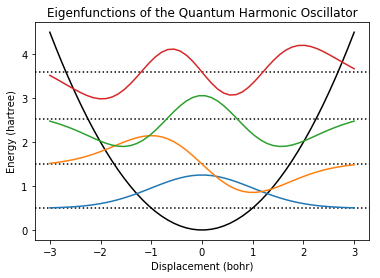

In [116]:
x = np.linspace(-3,3)
m = 1.0
ohm = 1.0
T = (-0.5/m)*Laplacian(x)
V = 0.5*(ohm**2)*(x**2)
H =  T + np.diag(V)
E,U = np.linalg.eigh(H)
h = x[1]-x[0]

# Plot the Harmonic potential
plt.plot(x,V,color='k')

for i in range(4):
    # For each of the first few solutions, plot the energy level:
    plt.axhline(y=E[i],color='k',ls=":")
    # as well as the eigenfunction, displaced by the energy level so they don't
    # all pile up on each other:
    plt.plot(x,-U[:,i]/np.sqrt(h)+E[i])
plt.title("Eigenfunctions of the Quantum Harmonic Oscillator")
plt.xlabel("Displacement (bohr)")
plt.ylabel("Energy (hartree)")

We've made a couple of hacks here to get the orbitals the way we want them. First, I inserted a -1 factor before the wave functions, to fix the phase of the lowest state. The phase (sign) of a quantum wave function doesn't hold any information, only the square of the wave function does, so this doesn't really change anything. 

But the eigenfunctions as we generate them aren't properly normalized. The reason is that finite difference isn't a real basis in the quantum mechanical sense. It's a basis of Dirac δ functions at each point; we interpret the space betwen the points as being "filled" by the wave function, but the finite difference basis only has the solution being at the points themselves. We can fix this by dividing the eigenfunctions of our finite difference Hamiltonian by the square root of the spacing, and this gives properly normalized functions.

## Special Functions
The solutions to the Harmonic Oscillator are supposed to be Hermite polynomials. The Wikipedia page has the HO states given by

$$\psi_n(x) = \frac{1}{\sqrt{2^n n!}}
\left(\frac{m\omega}{\pi\hbar}\right)^{1/4}
\exp\left(-\frac{m\omega x^2}{2\hbar}\right)
H_n\left(\sqrt{\frac{m\omega}{\hbar}}x\right)$$

Let's see whether they look like those. There are some special functions in the Numpy library, and some more in Scipy. Hermite Polynomials are in Numpy:

In [117]:
from numpy.polynomial.hermite import Hermite
def ho_evec(x,n,m,ohm):
    vec = [0]*9
    vec[n] = 1
    Hn = Hermite(vec)
    return (1/np.sqrt(2**n*factorial(n)))*pow(m*ohm/pi,0.25)*np.exp(-0.5*m*ohm*x**2)*Hn(x*np.sqrt(m*ohm))

Let's compare the first function to our solution.

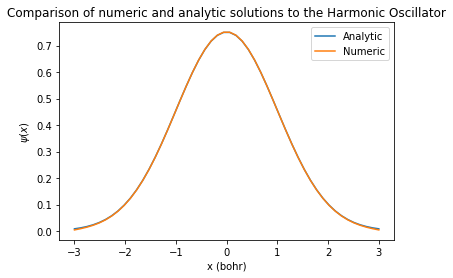

In [118]:
plt.plot(x,ho_evec(x,0,1,1),label="Analytic")
plt.plot(x,-U[:,0]/np.sqrt(h),label="Numeric")
plt.xlabel('x (bohr)')
plt.ylabel(r'$\psi(x)$')
plt.title("Comparison of numeric and analytic solutions to the Harmonic Oscillator")
plt.legend()

The agreement is almost exact.

We can use the **subplot** command to put multiple comparisons in different panes on a single plot:

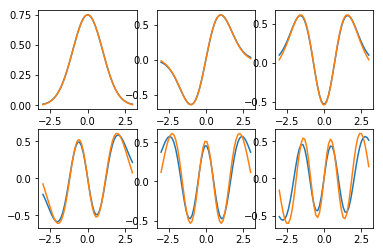

In [119]:
phase_correction = [-1,1,1,-1,-1,1]
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(x,ho_evec(x,i,1,1),label="Analytic")
    plt.plot(x,phase_correction[i]*U[:,i]/np.sqrt(h),label="Numeric")

Other than phase errors (which I've corrected with a little hack: can you find it?), the agreement is pretty good, although it gets worse the higher in energy we get, in part because we used only 50 points.

The Scipy module has many more special functions:

Text(0.5, 1.0, 'Legendre polynomials')

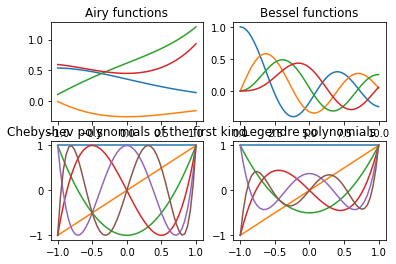

In [120]:
from scipy.special import airy,jn,eval_chebyt,eval_legendre
plt.subplot(2,2,1)
x = np.linspace(-1,1)
Ai,Aip,Bi,Bip = airy(x)
plt.plot(x,Ai)
plt.plot(x,Aip)
plt.plot(x,Bi)
plt.plot(x,Bip)
plt.title("Airy functions")

plt.subplot(2,2,2)
x = np.linspace(0,10)
for i in range(4):
    plt.plot(x,jn(i,x))
plt.title("Bessel functions")

plt.subplot(2,2,3)
x = np.linspace(-1,1)
for i in range(6):
    plt.plot(x,eval_chebyt(i,x))
plt.title("Chebyshev polynomials of the first kind")

plt.subplot(2,2,4)
x = np.linspace(-1,1)
for i in range(6):
    plt.plot(x,eval_legendre(i,x))
plt.title("Legendre polynomials")

As well as Jacobi, Laguerre, Hermite polynomials, Hypergeometric functions, and many others. There's a full listing at the [Scipy Special Functions Page](http://docs.scipy.org/doc/scipy/reference/special.html).

## Least squares fitting
Very often we deal with some data that we want to fit to some sort of expected behavior. Say we have the following:

In [121]:
raw_data = """\
3.1905781584582433,0.028208609537968457
4.346895074946466,0.007160804747670053
5.374732334047101,0.0046962988461934805
8.201284796573875,0.0004614473299618756
10.899357601713055,0.00005038370219939726
16.295503211991434,4.377451812785309e-7
21.82012847965739,3.0799922117601088e-9
32.48394004282656,1.524776208284536e-13
43.53319057815846,5.5012073588707224e-18"""

There's a section below on parsing CSV data. We'll steal the parser from that. For an explanation, skip ahead to that section. Otherwise, just assume that this is a way to parse that text into a numpy array that we can plot and do other analyses with.

In [122]:
data = []
for line in raw_data.splitlines():
    words = line.split(',')
    data.append(list(map(float,words)))
data = np.array(data)
data

array([[3.19057816e+00, 2.82086095e-02],
       [4.34689507e+00, 7.16080475e-03],
       [5.37473233e+00, 4.69629885e-03],
       [8.20128480e+00, 4.61447330e-04],
       [1.08993576e+01, 5.03837022e-05],
       [1.62955032e+01, 4.37745181e-07],
       [2.18201285e+01, 3.07999221e-09],
       [3.24839400e+01, 1.52477621e-13],
       [4.35331906e+01, 5.50120736e-18]])

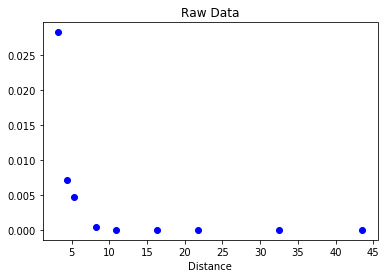

In [123]:
plt.title("Raw Data")
plt.xlabel("Distance")
plt.plot(data[:,0],data[:,1],'bo')

Since we expect the data to have an exponential decay, we can plot it using a semi-log plot.

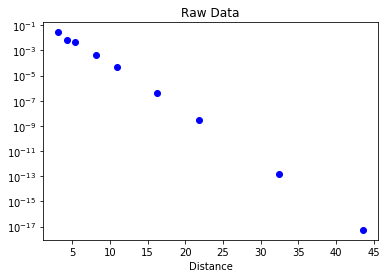

In [124]:
plt.title("Raw Data")
plt.xlabel("Distance")
plt.semilogy(data[:,0],data[:,1],'bo')

For a pure exponential decay like this, we can fit the log of the data to a straight line. The above plot suggests this is a good approximation. Given a function
$$ y = Ae^{-ax} $$
$$ \log(y) = \log(A) - ax$$
Thus, if we fit the log of the data versus x, we should get a straight line with slope $a$, and an intercept that gives the constant $A$.

There's a numpy function called **polyfit** that will fit data to a polynomial form. We'll use this to fit to a straight line (a polynomial of order 1)

In [125]:
params = np.polyfit(data[:,0],np.log(data[:,1]),1)
a = params[0]
A = np.exp(params[1])

Let's see whether this curve fits the data.

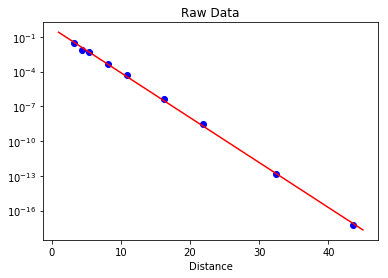

In [126]:
x = np.linspace(1,45)
plt.title("Raw Data")
plt.xlabel("Distance")
plt.semilogy(data[:,0],data[:,1],'bo')
plt.semilogy(x,A*np.exp(a*x),'r-')

If we have more complicated functions, we may not be able to get away with fitting to a simple polynomial. Consider the following data:

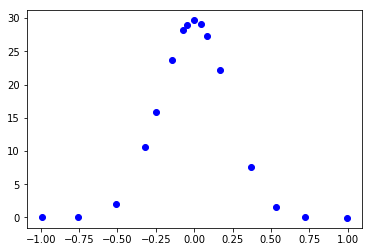

In [127]:
gauss_data = """\
-0.9902286902286903,1.4065274110372852e-19
-0.7566104566104566,2.2504438576596563e-18
-0.5117810117810118,1.9459459459459454
-0.31887271887271884,10.621621621621626
-0.250997150997151,15.891891891891893
-0.1463309463309464,23.756756756756754
-0.07267267267267263,28.135135135135133
-0.04426734426734419,29.02702702702703
-0.0015939015939017698,29.675675675675677
0.04689304689304685,29.10810810810811
0.0840994840994842,27.324324324324326
0.1700546700546699,22.216216216216214
0.370878570878571,7.540540540540545
0.5338338338338338,1.621621621621618
0.722014322014322,0.08108108108108068
0.9926849926849926,-0.08108108108108646"""

data = []
for line in gauss_data.splitlines():
    words = line.split(',')
    data.append(list(map(float,words)))
data = np.array(data)

plt.plot(data[:,0],data[:,1],'bo')

This data looks more Gaussian than exponential. If we wanted to, we could use **polyfit** for this as well, but let's use the **curve_fit** function from Scipy, which can fit to arbitrary functions. You can learn more using help(curve_fit).

First define a general Gaussian function to fit to.

In [128]:
def gauss(x,A,a): return A*np.exp(a*x**2)

Now fit to it using **curve_fit**:

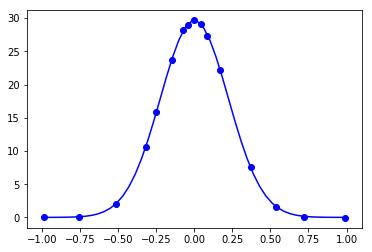

In [129]:
from scipy.optimize import curve_fit

params,conv = curve_fit(gauss,data[:,0],data[:,1])
x = np.linspace(-1,1)
plt.plot(data[:,0],data[:,1],'bo')
A,a = params
plt.plot(x,gauss(x,A,a),'b-')

The **curve_fit** routine we just used is built on top of a very good general **minimization** capability in Scipy. You can learn more [at the scipy documentation pages](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

## Monte Carlo, random numbers, and computing $\pi$
Many methods in scientific computing rely on Monte Carlo integration, where a sequence of (pseudo) random numbers are used to approximate the integral of a function. Python has good random number generators in the standard library. The **random()** function gives pseudorandom numbers uniformly distributed between 0 and 1:

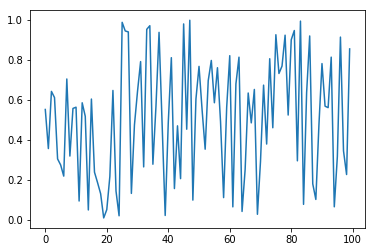

In [130]:
from random import random
rands = []
for i in range(100):
    rands.append(random())
plt.plot(rands)

**random()** uses the [Mersenne Twister](http://www.math.sci.hiroshima-u.ac.jp/~m-mat/MT/emt.html) algorithm, which is a highly regarded pseudorandom number generator. There are also functions to generate random integers, to randomly shuffle a list, and functions to pick random numbers from a particular distribution, like the normal distribution:

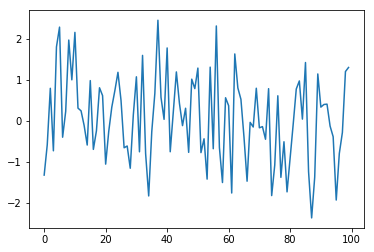

In [131]:
from random import gauss
grands = []
for i in range(100):
    grands.append(gauss(0,1))
plt.plot(grands)

It is generally more efficient to generate a list of random numbers all at once, particularly if you're drawing from a non-uniform distribution. Numpy has functions to generate vectors and matrices of particular types of random distributions.

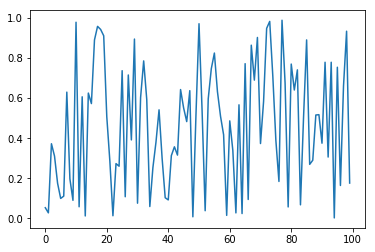

In [132]:
plt.plot(np.random.rand(100))

One of the first programs I ever wrote was a program to compute $\pi$ by taking random numbers as x and y coordinates, and counting how many of them were in the unit circle. For example:

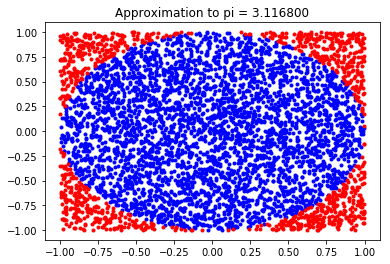

In [133]:
npts = 5000
xs = 2*np.random.rand(npts)-1
ys = 2*np.random.rand(npts)-1
r = xs**2+ys**2
ninside = (r<1).sum()
#plt.figsize(6,6) # make the figure square
plt.title("Approximation to pi = %f" % (4*ninside/float(npts)))
plt.plot(xs[r<1],ys[r<1],'b.')
plt.plot(xs[r>1],ys[r>1],'r.')
#plt.figsize(8,6) # change the figsize back to 4x3 for the rest of the notebook

The idea behind the program is that the ratio of the area of the unit circle to the square that inscribes it is $\pi/4$, so by counting the fraction of the random points in the square that are inside the circle, we get increasingly good estimates to $\pi$. 

The above code uses some higher level Numpy tricks to compute the radius of each point in a single line, to count how many radii are below one in a single line, and to filter the x,y points based on their radii. To be honest, I rarely write code like this: I find some of these Numpy tricks a little too cute to remember them, and I'm more likely to use a list comprehension (see below) to filter the points I want, since I can remember that.

As methods of computing $\pi$ go, this is among the worst. A much better method is to use Leibniz's expansion of arctan(1):

$$\frac{\pi}{4} = \sum_k \frac{(-1)^k}{2*k+1}$$

In [134]:
n = 100
total = 0
for k in range(n):
    total += pow(-1,k)/(2*k+1.0)
print(4*total)

3.1315929035585537


If you're interested a great method, check out [Ramanujan's method](http://en.wikipedia.org/wiki/Approximations_of_%CF%80). This converges so fast you really need arbitrary precision math to display enough decimal places. You can do this with the Python **decimal** module, if you're interested.

## Numerical Integration
Integration can be hard, and sometimes it's easier to work out a definite integral using an approximation. For example, suppose we wanted to figure out the integral:

$$\int_0^\infty\exp(-x)dx=1$$

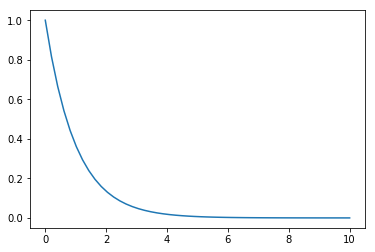

In [135]:
from numpy import sqrt,exp   #instead of writing np.sqrt or np.exp each time
def f(x): return exp(-x)
x = np.linspace(0,10)
plt.plot(x,exp(-x))

Scipy has a numerical integration routine **quad** (since sometimes numerical integration is called *quadrature*), that we can use for this:

In [136]:
from scipy.integrate import quad
quad(f,0,np.inf)

(1.0000000000000002, 5.842606742906004e-11)

There are also 2d and 3d numerical integrators in Scipy. [See the docs](http://docs.scipy.org/doc/scipy/reference/integrate.html) for more information.

## Fast Fourier Transform and Signal Processing


Very often we want to use FFT techniques to help obtain the signal from noisy data. Scipy has several different options for this.

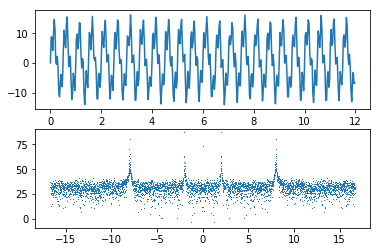

In [137]:
from scipy.fftpack import fft,fftfreq
from math import pi

npts = 4000
nplot = npts//10
t = np.linspace(0,120,npts)
def acc(t): return 10*np.sin(2*pi*2.0*t) + 5*np.sin(2*pi*8.0*t) + 2*np.random.rand(npts)

signal = acc(t)

FFT = abs(fft(signal))
freqs = fftfreq(npts, t[1]-t[0])

plt.subplot(211)
plt.plot(t[:nplot], signal[:nplot])
plt.subplot(212)
plt.plot(freqs,20*np.log10(FFT),',')
plt.show()

There are additional signal processing routines in Scipy that you can [read about here](http://docs.scipy.org/doc/scipy/reference/tutorial/signal.html).

# III. Intermediate Python

## Output Parsing
As more and more of our day-to-day work is being done on and through computers, we increasingly have output that one program writes, often in a text file, that we need to analyze in one way or another, and potentially feed that output into another file.

Suppose we have the following output:

In [138]:
myoutput = """\
@ Step       Energy      Delta E   Gmax     Grms     Xrms     Xmax   Walltime
@ ---- ---------------- -------- -------- -------- -------- -------- --------
@    0   -6095.12544083  0.0D+00  0.03686  0.00936  0.00000  0.00000   1391.5
@    1   -6095.25762870 -1.3D-01  0.00732  0.00168  0.32456  0.84140  10468.0
@    2   -6095.26325979 -5.6D-03  0.00233  0.00056  0.06294  0.14009  11963.5
@    3   -6095.26428124 -1.0D-03  0.00109  0.00024  0.03245  0.10269  13331.9
@    4   -6095.26463203 -3.5D-04  0.00057  0.00013  0.02737  0.09112  14710.8
@    5   -6095.26477615 -1.4D-04  0.00043  0.00009  0.02259  0.08615  20211.1
@    6   -6095.26482624 -5.0D-05  0.00015  0.00002  0.00831  0.03147  21726.1
@    7   -6095.26483584 -9.6D-06  0.00021  0.00004  0.01473  0.05265  24890.5
@    8   -6095.26484405 -8.2D-06  0.00005  0.00001  0.00555  0.01929  26448.7
@    9   -6095.26484599 -1.9D-06  0.00003  0.00001  0.00164  0.00564  27258.1
@   10   -6095.26484676 -7.7D-07  0.00003  0.00001  0.00161  0.00553  28155.3
@   11   -6095.26484693 -1.8D-07  0.00002  0.00000  0.00054  0.00151  28981.7
@   11   -6095.26484693 -1.8D-07  0.00002  0.00000  0.00054  0.00151  28981.7"""

This output actually came from a geometry optimization of a Silicon cluster using the [NWChem](http://www.nwchem-sw.org/index.php/Main_Page) quantum chemistry suite. At every step the program computes the energy of the molecular geometry, and then changes the geometry to minimize the computed forces, until the energy converges. I obtained this output via the unix command

    % grep @ nwchem.out

since NWChem is nice enough to precede the lines that you need to monitor job progress with the '@' symbol.

We could do the entire analysis in Python; I'll show how to do this later on, but first let's focus on turning this code into a usable Python object that we can plot.

First, note that the data is entered into a multi-line string. When Python sees three quote marks """ or ''' it treats everything following as part of a single string, including newlines, tabs, and anything else, until it sees the same three quote marks (""" has to be followed by another """, and ''' has to be followed by another ''') again. This is a convenient way to quickly dump data into Python, and it also reinforces the important idea that you don't have to open a file and deal with it one line at a time. You can read everything in, and deal with it as one big chunk.

The first thing we'll do, though, is to split the big string into a list of strings, since each line corresponds to a separate piece of data. We will use the **splitlines()** function on the big myout string to break it into a new element every time it sees a newline (\n) character:

In [139]:
lines = myoutput.splitlines()
lines

['@ Step       Energy      Delta E   Gmax     Grms     Xrms     Xmax   Walltime',
 '@ ---- ---------------- -------- -------- -------- -------- -------- --------',
 '@    0   -6095.12544083  0.0D+00  0.03686  0.00936  0.00000  0.00000   1391.5',
 '@    1   -6095.25762870 -1.3D-01  0.00732  0.00168  0.32456  0.84140  10468.0',
 '@    2   -6095.26325979 -5.6D-03  0.00233  0.00056  0.06294  0.14009  11963.5',
 '@    3   -6095.26428124 -1.0D-03  0.00109  0.00024  0.03245  0.10269  13331.9',
 '@    4   -6095.26463203 -3.5D-04  0.00057  0.00013  0.02737  0.09112  14710.8',
 '@    5   -6095.26477615 -1.4D-04  0.00043  0.00009  0.02259  0.08615  20211.1',
 '@    6   -6095.26482624 -5.0D-05  0.00015  0.00002  0.00831  0.03147  21726.1',
 '@    7   -6095.26483584 -9.6D-06  0.00021  0.00004  0.01473  0.05265  24890.5',
 '@    8   -6095.26484405 -8.2D-06  0.00005  0.00001  0.00555  0.01929  26448.7',
 '@    9   -6095.26484599 -1.9D-06  0.00003  0.00001  0.00164  0.00564  27258.1',
 '@   10   -6095

Splitting is a big concept in text processing. We used **splitlines()** here, and we will use the more general **split()** function below to split each line into whitespace-delimited words.

We now want to do three things:

* Skip over the lines that don't carry any information
* Break apart each line that does carry information and grab the pieces we want
* Turn the resulting data into something that we can plot.

For this data, we really only want the Energy column, the Gmax column (which contains the maximum gradient at each step), and perhaps the Walltime column. 

Since the data is now in a list of lines, we can iterate over it:

In [140]:
for line in lines[2:]:
    # do something with each line
    words = line.split()

Let's examine what we just did: first, we used a **for** loop to iterate over each line. However, we skipped the first two (the lines[2:] only takes the lines starting from index 2), since lines[0] contained the title information, and lines[1] contained underscores.

We then split each line into chunks (which we're calling "words", even though in most cases they're numbers) using the string **split()** command.

Here we're implicitly passing in the first argument (s, in the doctext) by calling a method .split() on a string object. In this instance, we're not passing in a sep character, which means that the function splits on whitespace. Let's see what that does to one of our lines:

In [141]:
lines[2].split()

['@',
 '0',
 '-6095.12544083',
 '0.0D+00',
 '0.03686',
 '0.00936',
 '0.00000',
 '0.00000',
 '1391.5']

This is almost exactly what we want. We just have to now pick the fields we want:

In [142]:
for line in lines[2:]:
    # do something with each line
    words = line.split()
    energy = words[2]
    gmax = words[4]
    time = words[8]
    print(energy,gmax,time)

-6095.12544083 0.03686 1391.5
-6095.25762870 0.00732 10468.0
-6095.26325979 0.00233 11963.5
-6095.26428124 0.00109 13331.9
-6095.26463203 0.00057 14710.8
-6095.26477615 0.00043 20211.1
-6095.26482624 0.00015 21726.1
-6095.26483584 0.00021 24890.5
-6095.26484405 0.00005 26448.7
-6095.26484599 0.00003 27258.1
-6095.26484676 0.00003 28155.3
-6095.26484693 0.00002 28981.7
-6095.26484693 0.00002 28981.7


This is fine for printing things out, but if we want to do something with the data, either make a calculation with it or pass it into a plotting, we need to convert the strings into regular floating point numbers. We can use the **float()** command for this. We also need to save it in some form. I'll do this as follows:

In [143]:
data = []
for line in lines[2:]:
    # do something with each line
    words = line.split()
    energy = float(words[2])
    gmax = float(words[4])
    time = float(words[8])
    data.append((energy,gmax,time))
data = np.array(data)
data

array([[-6.09512544e+03,  3.68600000e-02,  1.39150000e+03],
       [-6.09525763e+03,  7.32000000e-03,  1.04680000e+04],
       [-6.09526326e+03,  2.33000000e-03,  1.19635000e+04],
       [-6.09526428e+03,  1.09000000e-03,  1.33319000e+04],
       [-6.09526463e+03,  5.70000000e-04,  1.47108000e+04],
       [-6.09526478e+03,  4.30000000e-04,  2.02111000e+04],
       [-6.09526483e+03,  1.50000000e-04,  2.17261000e+04],
       [-6.09526484e+03,  2.10000000e-04,  2.48905000e+04],
       [-6.09526484e+03,  5.00000000e-05,  2.64487000e+04],
       [-6.09526485e+03,  3.00000000e-05,  2.72581000e+04],
       [-6.09526485e+03,  3.00000000e-05,  2.81553000e+04],
       [-6.09526485e+03,  2.00000000e-05,  2.89817000e+04],
       [-6.09526485e+03,  2.00000000e-05,  2.89817000e+04]])

We now have our data in a numpy array, so we can choose columns to print:

Text(0.5, 1.0, 'Convergence of NWChem geometry optimization for Si cluster')

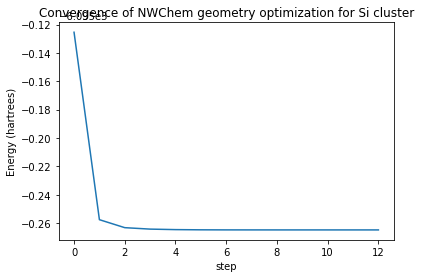

In [144]:
plt.plot(data[:,0])
plt.xlabel('step')
plt.ylabel('Energy (hartrees)')
plt.title('Convergence of NWChem geometry optimization for Si cluster')

I would write the code a little more succinctly if I were doing this for myself, but this is essentially a snippet I use repeatedly. 

Suppose our data was in CSV (comma separated values) format, a format that originally came from Microsoft Excel, and is increasingly used as a data interchange format in big data applications. How would we parse that?

In [145]:
csv = """\
-6095.12544083, 0.03686, 1391.5
-6095.25762870, 0.00732, 10468.0
-6095.26325979, 0.00233, 11963.5
-6095.26428124, 0.00109, 13331.9
-6095.26463203, 0.00057, 14710.8
-6095.26477615, 0.00043, 20211.1
-6095.26482624, 0.00015, 21726.1
-6095.26483584, 0.00021, 24890.5
-6095.26484405, 0.00005, 26448.7
-6095.26484599, 0.00003, 27258.1
-6095.26484676, 0.00003, 28155.3
-6095.26484693, 0.00002, 28981.7
-6095.26484693, 0.00002, 28981.7"""

We can do much the same as before:

In [146]:
data = []
for line in csv.splitlines():
    words = line.split(',')
    data.append(list(map(float,words)))
data = np.array(data)
data

array([[-6.09512544e+03,  3.68600000e-02,  1.39150000e+03],
       [-6.09525763e+03,  7.32000000e-03,  1.04680000e+04],
       [-6.09526326e+03,  2.33000000e-03,  1.19635000e+04],
       [-6.09526428e+03,  1.09000000e-03,  1.33319000e+04],
       [-6.09526463e+03,  5.70000000e-04,  1.47108000e+04],
       [-6.09526478e+03,  4.30000000e-04,  2.02111000e+04],
       [-6.09526483e+03,  1.50000000e-04,  2.17261000e+04],
       [-6.09526484e+03,  2.10000000e-04,  2.48905000e+04],
       [-6.09526484e+03,  5.00000000e-05,  2.64487000e+04],
       [-6.09526485e+03,  3.00000000e-05,  2.72581000e+04],
       [-6.09526485e+03,  3.00000000e-05,  2.81553000e+04],
       [-6.09526485e+03,  2.00000000e-05,  2.89817000e+04],
       [-6.09526485e+03,  2.00000000e-05,  2.89817000e+04]])

There are two significant changes over what we did earlier. First, I'm passing the comma character ',' into the split function, so that it breaks to a new word every time it sees a comma. Next, to simplify things a big, I'm using the **map()** command to repeatedly apply a single function (**float()**) to a list, and to return the output as a list.

In [147]:
help(map)

Help on class map in module builtins:

class map(object)
 |  map(func, *iterables) --> map object
 |  
 |  Make an iterator that computes the function using arguments from
 |  each of the iterables.  Stops when the shortest iterable is exhausted.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.



Despite the differences, the resulting plot should be the same:

Text(0.5, 1.0, 'Convergence of NWChem geometry optimization for Si cluster')

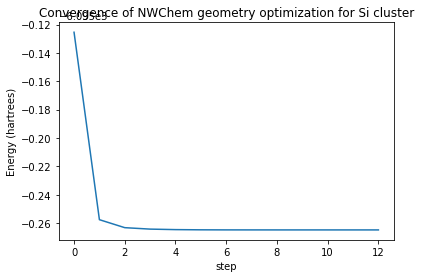

In [148]:
plt.plot(data[:,0])
plt.xlabel('step')
plt.ylabel('Energy (hartrees)')
plt.title('Convergence of NWChem geometry optimization for Si cluster')

Hartrees (what most quantum chemistry programs use by default) are really stupid units. We really want this in kcal/mol or eV or something we use. So let's quickly replot this in terms of eV above the minimum energy, which will give us a much more useful plot:

Text(0.5, 1.0, 'Convergence of NWChem geometry optimization for Si cluster')

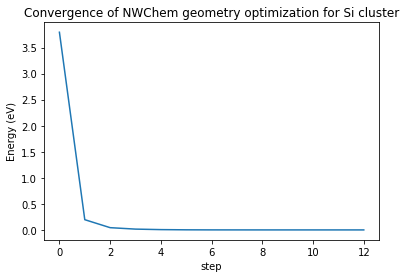

In [149]:
energies = data[:,0]
minE = min(energies)
energies_eV = 27.211*(energies-minE)
plt.plot(energies_eV)
plt.xlabel('step')
plt.ylabel('Energy (eV)')
plt.title('Convergence of NWChem geometry optimization for Si cluster')

This gives us the output in a form that we can think about: 4 eV is a fairly substantial energy change (chemical bonds are roughly this magnitude of energy), and most of the energy decrease was obtained in the first geometry iteration.

We mentioned earlier that we don't have to rely on **grep** to pull out the relevant lines for us. The **string** module has a lot of useful functions we can use for this. Among them is the **startswith** function. For example:

In [150]:
lines = """\
                 ----------------------------------------
                 |  WALL  |       0.45   |     443.61   |
                 ----------------------------------------

@ Step       Energy      Delta E   Gmax     Grms     Xrms     Xmax   Walltime
@ ---- ---------------- -------- -------- -------- -------- -------- --------
@    0   -6095.12544083  0.0D+00  0.03686  0.00936  0.00000  0.00000   1391.5
                                                       ok       ok



                                Z-matrix (autoz)
                                --------
""".splitlines()

for line in lines:
    if line.startswith('@'):
        print(line)
        

@ Step       Energy      Delta E   Gmax     Grms     Xrms     Xmax   Walltime
@ ---- ---------------- -------- -------- -------- -------- -------- --------
@    0   -6095.12544083  0.0D+00  0.03686  0.00936  0.00000  0.00000   1391.5


and we've successfully grabbed all of the lines that begin with the @ symbol.

The real value in a language like Python is that it makes it easy to take additional steps to analyze data in this fashion, which means you are thinking more about your data, and are more likely to see important patterns.

## More Sophisticated String Formatting and Processing
Strings are a big deal in most modern languages, and hopefully the previous sections helped underscore how versatile Python's string processing techniques are. We will continue this topic in this chapter.

We can print out lines in Python using the print command. 

In [151]:
print("I have 3 errands to run")

I have 3 errands to run


In IPython we don't even need the print command, since it will display the last expression not assigned to a variable.

In [152]:
"I have 3 errands to run"

'I have 3 errands to run'

**print** even converts some arguments to strings for us:

In [153]:
a,b,c = 1,2,3
print("The variables are ",1,2,3)

The variables are  1 2 3


As versatile as this is, you typically need more freedom over the data you print out. For example, what if we want to print a bunch of data to exactly 4 decimal places? We can do this using formatted strings.

Formatted strings share a syntax with the C **printf** statement. We make a string that has some funny *format characters* in it, and then pass a bunch of variables into the string that fill out those characters in different ways.

For example,

In [154]:
print("Pi as a decimal = %d" % pi)
print("Pi as a float = %f" % pi)
print("Pi with 4 decimal places = %.4f" % pi)
print("Pi with overall fixed length of 10 spaces, with 6 decimal places = %10.6f" % pi)
print("Pi as in exponential format = %e" % pi)

Pi as a decimal = 3
Pi as a float = 3.141593
Pi with 4 decimal places = 3.1416
Pi with overall fixed length of 10 spaces, with 6 decimal places =   3.141593
Pi as in exponential format = 3.141593e+00


We use a percent sign in two different ways here. First, the format character itself starts with a percent sign. %d or %i are for integers, %f is for floats, %e is for numbers in exponential formats. All of the numbers can take number immediately after the percent that specifies the total spaces used to print the number. Formats with a decimal can take an additional number after a dot . to specify the number of decimal places to print.

The other use of the percent sign is after the string, to pipe a set of variables in. You can pass in multiple variables (if your formatting string supports it) by putting a tuple after the percent. Thus,

In [155]:
print("The variables specified earlier are %d, %d, and %d" % (a,b,c) )

The variables specified earlier are 1, 2, and 3


This is a simple formatting structure that will satisfy most of your string formatting needs. More information on different format symbols is available in the [string formatting part of the standard docs](http://docs.python.org/release/2.5.2/lib/typesseq-strings.html).

It's worth noting that more complicated string formatting methods are in development, but I prefer this system due to its simplicity and its similarity to C formatting strings.

Recall we discussed multiline strings. We can put format characters in these as well, and fill them with the percent sign as before.

In [156]:
form_letter = """\

          %s

Dear %s,

We regret to inform you that your product did not
ship today due to %s.

We hope to remedy this as soon as possible.

          From,
          Your Supplier
"""

print(form_letter % ("July 1, 2013","Valued Customer Bob","alien attack"))


          July 1, 2013

Dear Valued Customer Bob,

We regret to inform you that your product did not
ship today due to alien attack.

We hope to remedy this as soon as possible.

          From,
          Your Supplier



The problem with a long block of text like this is that it's often hard to keep track of what all of the variables are supposed to stand for. There's an alternate format where you can pass a dictionary into the formatted string, and give a little bit more information to the formatted string itself. This method looks like:

In [157]:
form_letter = """\

          %(date)s

Dear %(customer)s,

We regret to inform you that your product did not
ship today due to %(lame_excuse)s.

We hope to remedy this as soon as possible.

          From,
          Your Supplier
"""

print(form_letter % {"date" : "July 1, 2013","customer":"Valued Customer Bob","lame_excuse":"alien attack"})


          July 1, 2013

Dear Valued Customer Bob,

We regret to inform you that your product did not
ship today due to alien attack.

We hope to remedy this as soon as possible.

          From,
          Your Supplier



By providing a little bit more information, you're less likely to make mistakes, like referring to your customer as "alien attack".

As a scientist, you're less likely to be sending bulk mailings to a bunch of customers. But these are great methods for generating and submitting lots of similar runs, say scanning a bunch of different structures to find the optimal configuration for something.

For example, you can use the following template for NWChem input files:

In [158]:
nwchem_format = """
start %(jobname)s

title "%(thetitle)s"
charge %(charge)d

geometry units angstroms print xyz autosym
%(geometry)s
end

basis
  * library 6-31G**
end

dft
  xc %(dft_functional)s
  mult %(multiplicity)d
end

task dft %(jobtype)s
"""

If you want to submit a sequence of runs to a computer somewhere, it's pretty easy to put together a little script, maybe even with some more string formatting in it:

In [159]:
oxygen_xy_coords = [(0,0),(0,0.1),(0.1,0),(0.1,0.1)]
charge = 0
multiplicity = 1
dft_functional = "b3lyp"
jobtype = "optimize"

geometry_template = """\
  O    %f     %f      0.0
  H    0.0    1.0     0.0
  H    1.0    0.0     0.0"""

for i,xy in enumerate(oxygen_xy_coords):
    thetitle = "Water run #%d" % i
    jobname = "h2o-%d" % i
    geometry = geometry_template % xy
    print("---------")
    print(nwchem_format % dict(thetitle=thetitle,charge=charge,jobname=jobname,jobtype=jobtype,
                               geometry=geometry,dft_functional=dft_functional,multiplicity=multiplicity))

---------

start h2o-0

title "Water run #0"
charge 0

geometry units angstroms print xyz autosym
  O    0.000000     0.000000      0.0
  H    0.0    1.0     0.0
  H    1.0    0.0     0.0
end

basis
  * library 6-31G**
end

dft
  xc b3lyp
  mult 1
end

task dft optimize

---------

start h2o-1

title "Water run #1"
charge 0

geometry units angstroms print xyz autosym
  O    0.000000     0.100000      0.0
  H    0.0    1.0     0.0
  H    1.0    0.0     0.0
end

basis
  * library 6-31G**
end

dft
  xc b3lyp
  mult 1
end

task dft optimize

---------

start h2o-2

title "Water run #2"
charge 0

geometry units angstroms print xyz autosym
  O    0.100000     0.000000      0.0
  H    0.0    1.0     0.0
  H    1.0    0.0     0.0
end

basis
  * library 6-31G**
end

dft
  xc b3lyp
  mult 1
end

task dft optimize

---------

start h2o-3

title "Water run #3"
charge 0

geometry units angstroms print xyz autosym
  O    0.100000     0.100000      0.0
  H    0.0    1.0     0.0
  H    1.0    0.0     

This is a very bad geometry for a water molecule, and it would be silly to run so many geometry optimizations of structures that are guaranteed to converge to the same single geometry, but you get the idea of how you can run vast numbers of simulations with a technique like this.

We used the **enumerate** function to loop over both the indices and the items of a sequence, which is valuable when you want a clean way of getting both. **enumerate** is roughly equivalent to:

In [160]:
def my_enumerate(seq):
    l = []
    for i in range(len(seq)):
        l.append((i,seq[i]))
    return l
my_enumerate(oxygen_xy_coords)

[(0, (0, 0)), (1, (0, 0.1)), (2, (0.1, 0)), (3, (0.1, 0.1))]

Although enumerate uses **generators** (see below) so that it doesn't have to create a big list, which makes it faster for really long sequenes.

## Optional arguments
You will recall that the **linspace** function can take either two arguments (for the starting and ending points):

In [161]:
np.linspace(0,1)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

or it can take three arguments, for the starting point, the ending point, and the number of points:

In [162]:
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

You can also pass in keywords to exclude the endpoint:

In [163]:
np.linspace(0,1,5,endpoint=False)

array([0. , 0.2, 0.4, 0.6, 0.8])

Right now, we only know how to specify functions that have a fixed number of arguments. We'll learn how to do the more general cases here.

If we're defining a simple version of linspace, we would start with:

In [164]:
def my_linspace(start,end):
    npoints = 50
    v = []
    d = (end-start)/float(npoints-1)
    for i in range(npoints):
        v.append(start + i*d)
    return v
my_linspace(0,1)

[0.0,
 0.02040816326530612,
 0.04081632653061224,
 0.061224489795918366,
 0.08163265306122448,
 0.1020408163265306,
 0.12244897959183673,
 0.14285714285714285,
 0.16326530612244897,
 0.18367346938775508,
 0.2040816326530612,
 0.22448979591836732,
 0.24489795918367346,
 0.26530612244897955,
 0.2857142857142857,
 0.3061224489795918,
 0.32653061224489793,
 0.3469387755102041,
 0.36734693877551017,
 0.3877551020408163,
 0.4081632653061224,
 0.42857142857142855,
 0.44897959183673464,
 0.4693877551020408,
 0.4897959183673469,
 0.5102040816326531,
 0.5306122448979591,
 0.5510204081632653,
 0.5714285714285714,
 0.5918367346938775,
 0.6122448979591836,
 0.6326530612244897,
 0.6530612244897959,
 0.673469387755102,
 0.6938775510204082,
 0.7142857142857142,
 0.7346938775510203,
 0.7551020408163265,
 0.7755102040816326,
 0.7959183673469387,
 0.8163265306122448,
 0.836734693877551,
 0.8571428571428571,
 0.8775510204081632,
 0.8979591836734693,
 0.9183673469387754,
 0.9387755102040816,
 0.95918367346

We can add an optional argument by specifying a default value in the argument list:

In [165]:
def my_linspace(start,end,npoints = 50):
    v = []
    d = (end-start)/float(npoints-1)
    for i in range(npoints):
        v.append(start + i*d)
    return v

This gives exactly the same result if we don't specify anything:

In [166]:
my_linspace(0,1)

[0.0,
 0.02040816326530612,
 0.04081632653061224,
 0.061224489795918366,
 0.08163265306122448,
 0.1020408163265306,
 0.12244897959183673,
 0.14285714285714285,
 0.16326530612244897,
 0.18367346938775508,
 0.2040816326530612,
 0.22448979591836732,
 0.24489795918367346,
 0.26530612244897955,
 0.2857142857142857,
 0.3061224489795918,
 0.32653061224489793,
 0.3469387755102041,
 0.36734693877551017,
 0.3877551020408163,
 0.4081632653061224,
 0.42857142857142855,
 0.44897959183673464,
 0.4693877551020408,
 0.4897959183673469,
 0.5102040816326531,
 0.5306122448979591,
 0.5510204081632653,
 0.5714285714285714,
 0.5918367346938775,
 0.6122448979591836,
 0.6326530612244897,
 0.6530612244897959,
 0.673469387755102,
 0.6938775510204082,
 0.7142857142857142,
 0.7346938775510203,
 0.7551020408163265,
 0.7755102040816326,
 0.7959183673469387,
 0.8163265306122448,
 0.836734693877551,
 0.8571428571428571,
 0.8775510204081632,
 0.8979591836734693,
 0.9183673469387754,
 0.9387755102040816,
 0.95918367346

But also let's us override the default value with a third argument:

In [167]:
my_linspace(0,1,5)

[0.0, 0.25, 0.5, 0.75, 1.0]

We can add arbitrary keyword arguments to the function definition by putting a keyword argument \*\*kwargs handle in:

In [168]:
def my_linspace(start,end,npoints=50,**kwargs):
    endpoint = kwargs.get('endpoint',True)
    v = []
    if endpoint:
        d = (end-start)/float(npoints-1)
    else:
        d = (end-start)/float(npoints)
    for i in range(npoints):
        v.append(start + i*d)
    return v
my_linspace(0,1,5,endpoint=False)

[0.0, 0.2, 0.4, 0.6000000000000001, 0.8]

What the keyword argument construction does is to take any additional keyword arguments (i.e. arguments specified by name, like "endpoint=False"), and stick them into a dictionary called "kwargs" (you can call it anything you like, but it has to be preceded by two stars). You can then grab items out of the dictionary using the **get** command, which also lets you specify a default value. I realize it takes a little getting used to, but it is a common construction in Python code, and you should be able to recognize it.

There's an analogous \*args that dumps any additional arguments into a list called "args". Think about the **range** function: it can take one (the endpoint), two (starting and ending points), or three (starting, ending, and step) arguments. How would we define this?

In [169]:
def my_range(*args):
    start = 0
    step = 1
    if len(args) == 1:
        end = args[0]
    elif len(args) == 2:
        start,end = args
    elif len(args) == 3:
        start,end,step = args
    else:
        raise Exception("Unable to parse arguments")
    v = []
    value = start
    while True:
        v.append(value)
        value += step
        if value > end: break
    return v

Note that we have defined a few new things you haven't seen before: a **break** statement, that allows us to exit a for loop if some conditions are met, and an exception statement, that causes the interpreter to exit with an error message. For example:

In [170]:
my_range()

Exception: Unable to parse arguments

In [171]:
my_range(2)

[0, 1, 2]

## List Comprehensions and Generators
List comprehensions are a streamlined way to make lists. They look something like a list definition, with some logic thrown in. For example:

In [172]:
evens1 = [2*i for i in range(10)]
print(evens1)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


You can also put some boolean testing into the construct:

In [173]:
odds = [i for i in range(20) if i%2==1]
odds

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Here i%2 is the remainder when i is divided by 2, so that i%2==1 is true if the number is odd. Even though this is a relative new addition to the language, it is now fairly common since it's so convenient.

**iterators** are a way of making virtual sequence objects. Consider if we had the nested loop structure:

    for i in range(1000000):
        for j in range(1000000):

Inside the main loop, we make a list of 1,000,000 integers, just to loop over them one at a time. We don't need any of the additional things that a lists gives us, like slicing or random access, we just need to go through the numbers one at a time. And we're making 1,000,000 of them. 

**iterators** are a way around this. For example, the **xrange** function is the iterator version of range. This simply makes a counter that is looped through in sequence, so that the analogous loop structure would look like:

    for i in xrange(1000000):
        for j in xrange(1000000):

Even though we've only added two characters, we've dramatically sped up the code, because we're not making 1,000,000 big lists.

> `xrange()` in Python2 is `range()` in Python3, so we'll be using `range()` function below.

We can define our own iterators using the **yield** statement:

In [174]:
def evens_below(n):
    for i in range(n):
        if i%2 == 0:
            yield i
    return

for i in evens_below(9):
    print(i)

0
2
4
6
8


We can always turn an iterator into a list using the **list** command:

In [175]:
list(evens_below(9))

[0, 2, 4, 6, 8]

There's a special syntax called a **generator expression** that looks a lot like a list comprehension:

In [176]:
evens_gen = (i for i in range(9) if i%2==0)
for i in evens_gen:
    print(i)

0
2
4
6
8


## Factory Functions
A factory function is a function that returns a function. They have the fancy name *lexical closure*, which makes you sound really intelligent in front of your CS friends. But, despite the arcane names, factory functions can play a very practical role.

Suppose you want the Gaussian function centered at 0.5, with height 99 and width 1.0. You could write a general function.

In [177]:
def gauss(x,A,a,x0):
    return A*exp(-a*(x-x0)**2)

But what if you need a function with only one argument, like f(x) rather than f(x,y,z,...)? You can do this with Factory Functions:

In [178]:
def gauss_maker(A,a,x0):
    def f(x):
        return A*exp(-a*(x-x0)**2)
    return f

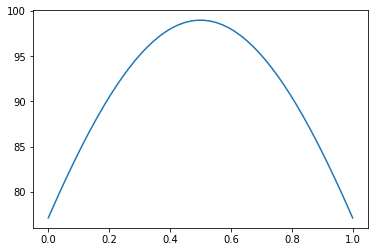

In [179]:
x = np.linspace(0,1)
g = gauss_maker(99.0,1.0,0.5)
plt.plot(x,g(x))

Everything in Python is an object, including functions. This means that functions can be returned by other functions. (They can also be passed into other functions, which is also useful, but a topic for another discussion.) In the **gauss_maker** example, the *g* function that is output "remembers" the A, a, x0 values it was constructed with, since they're all stored in the local memory space (this is what the *lexical closure* really refers to) of that function.

Factories are one of the more important of the [Software Design Patterns](http://en.wikipedia.org/wiki/Software_design_pattern), which are a set of guidelines to follow to make high-quality, portable, readable, stable software. It's beyond the scope of the current work to go more into either factories or design patterns, but I thought I would mention them for people interested in software design.

## Serialization: Save it for later
*Serialization* refers to the process of outputting data (and occasionally functions) to a database or a regular file, for the purpose of using it later on. In the very early days of programming languages, this was normally done in regular text files. Python is excellent at text processing, and you probably already know enough to get started with this.

When accessing large amounts of data became important, people developed database software based around the Structured Query Language (SQL) standard. I'm not going to cover SQL here, but, if you're interested, I recommend using the [sqlite3](http://docs.python.org/2/library/sqlite3.html) module in the Python standard library.

As data interchange became important, the eXtensible Markup Language (XML) has emerged. XML makes data formats that are easy to write parsers for, greatly simplifying the ambiguity that sometimes arises in the process. Again, I'm not going to cover XML here, but if you're interested in learning more, look into [Element Trees](http://docs.python.org/2/library/xml.etree.elementtree.html), now part of the Python standard library.

Python has a very general serialization format called **pickle** that can turn any Python object, even a function or a class, into a representation that can be written to a file and read in later. But, again, I'm not going to talk about this, since I rarely use it myself. Again, [the standard library documentation for pickle](http://docs.python.org/2/library/pickle.html#module-cPickle) is the place to go.

What I am going to talk about is a relatively recent format call [JavaScript Object Notation](http://json.org/) (JSON) that has become very popular over the past few years. [There's a module in the standard library](http://docs.python.org/2/library/json.html) for encoding and decoding JSON formats. The reason I like JSON so much is that it looks almost like Python, so that, unlike the other options, you can look at your data and edit it, use it in another program, etc.

Here's a little example:

In [180]:
# Data in a json format:
json_data = """\
{
    "a": [1,2,3],
    "b": [4,5,6],
    "greeting" : "Hello"
}"""
import json
json.loads(json_data)

{'a': [1, 2, 3], 'b': [4, 5, 6], 'greeting': 'Hello'}

Ignore the little u's before the strings, these just mean the strings are in UNICODE. Your data sits in something that looks like a Python dictionary, and in a single line of code, you can load it into a Python dictionary for use later.

In the same way, you can, with a single line of code, put a bunch of variables into a dictionary, and then output to a file using json:

In [181]:
json.dumps({"a":[1,2,3],"b":[9,10,11],"greeting":"Hola"})

'{"a": [1, 2, 3], "b": [9, 10, 11], "greeting": "Hola"}'

## Functional programming
Functional programming is a very broad subject. The idea is to have a series of functions, each of which generates a new data structure from an input, without changing the input structure at all. By not modifying the input structure (something that is called not having *side effects*), many guarantees can be made about how independent the processes are, which can help parallelization and guarantees of program accuracy. There is a [Python Functional Programming HOWTO](http://docs.python.org/2/howto/functional.html) in the standard docs that goes into more details on functional programming. I just wanted to touch on a few of the most important ideas here.

There is an **operator** module that has function versions of most of the Python operators. For example:

In [182]:
from operator import add, mul
add(1,2)

3

In [183]:
mul(3,4)

12

These are useful building blocks for functional programming.

The **lambda** operator allows us to build *anonymous functions*, which are simply functions that aren't defined by a normal **def** statement with a name. For example, a function that doubles the input is:

In [184]:
def doubler(x): return 2*x
doubler(17)

34

We could also write this as:

In [185]:
lambda x: 2*x

<function __main__.<lambda>(x)>

And assign it to a function separately:

In [186]:
another_doubler = lambda x: 2*x
another_doubler(19)

38

**lambda** is particularly convenient (as we'll see below) in passing simple functions as arguments to other functions.

**map** is a way to repeatedly apply a function to a list.

> `map()' in Python3 act as iterator/generator, can not be used as list. Thus, `list()` should be used. But a better fix is often to use a list comprehension

In [187]:
list(map(float,'1 2 3 4 5'.split()))

[1.0, 2.0, 3.0, 4.0, 5.0]

Here's the comprehension approach:

In [188]:
[i for i in map(float,'1 2 3 4 5'.split())]

[1.0, 2.0, 3.0, 4.0, 5.0]

**reduce** is a way to repeatedly apply a function to the first two items of the list. There already is a **sum** function in Python that is a reduction:

In [189]:
sum([1,2,3,4,5])

15

> **reduce** is removed in Python3, if you *really* need `reduce()` function then use `functools.reduce()`

We can use **reduce** to define an analogous **prod** function:

In [190]:
from functools import reduce
def prod(l): return reduce(mul,l)
prod([1,2,3,4,5])

120

## Object Oriented Programming

We've seen a lot of examples of **objects** in Python. We create a string object with quote marks:

In [191]:
mystring = "Hi there"

and we have a bunch of methods we can use on the object:

In [192]:
mystring.split()

['Hi', 'there']

In [193]:
mystring.startswith('Hi')

True

In [194]:
len(mystring)

8

Object oriented programming simply gives you the tools to define objects and methods for yourself. It's useful anytime you want to keep some data (like the characters in the string) tightly coupled to the functions that act on the data (length, split, startswith, etc.).

As an example, we're going to bundle the functions we did to make the 1d harmonic oscillator eigenfunctions with arbitrary potentials, so we can pass in a function defining that potential, some additional specifications, and get out something that can plot the orbitals, as well as do other things with them, if desired.

In [195]:
class Schrod1d:
    """\
    Schrod1d: Solver for the one-dimensional Schrodinger equation.
    """
    def __init__(self,V,start=0,end=1,npts=50,**kwargs):
        m = kwargs.get('m',1.0)
        self.x = np.linspace(start,end,npts)
        self.Vx = V(self.x)
        self.H = (-0.5/m)*self.laplacian() + np.diag(self.Vx)
        return
    
    def plot(self,*args,**kwargs):
        titlestring = kwargs.get('titlestring',"Eigenfunctions of the 1d Potential")
        xstring = kwargs.get('xstring',"Displacement (bohr)")
        ystring = kwargs.get('ystring',"Energy (hartree)")
        if not args:
            args = [3]
        x = self.x
        E,U = np.linalg.eigh(self.H)
        h = x[1]-x[0]

        # Plot the Potential
        plt.plot(x,self.Vx,color='k')

        for i in range(*args):
            # For each of the first few solutions, plot the energy level:
            plt.axhline(y=E[i],color='k',ls=":")
            # as well as the eigenfunction, displaced by the energy level so they don't
            # all pile up on each other:
            plt.plot(x,U[:,i]/sqrt(h)+E[i])
        plt.title(titlestring)
        plt.xlabel(xstring)
        plt.ylabel(ystring) 
        return
        
    def laplacian(self):
        x = self.x
        h = x[1]-x[0] # assume uniformly spaced points
        n = len(x)
        M = -2*np.identity(n,'d')
        for i in range(1,n):
            M[i,i-1] = M[i-1,i] = 1
        return M/h**2

The **__init__()** function specifies what operations go on when the object is created. The **self** argument is the object itself, and we don't pass it in. The only required argument is the function that defines the QM potential. We can also specify additional arguments that define the numerical grid that we're going to use for the calculation.

For example, to do an infinite square well potential, we have a function that is 0 everywhere. We don't have to specify the barriers, since we'll only define the potential in the well, which means that it can't be defined anywhere else.

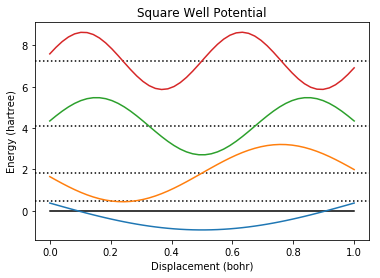

In [196]:
square_well = Schrod1d(lambda x: 0*x,m=10)
square_well.plot(4,titlestring="Square Well Potential")

We can similarly redefine the Harmonic Oscillator potential.

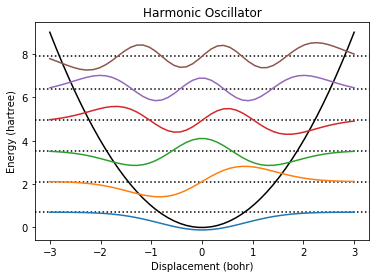

In [197]:
ho = Schrod1d(lambda x: x**2,start=-3,end=3)
ho.plot(6,titlestring="Harmonic Oscillator")

Let's define a finite well potential:

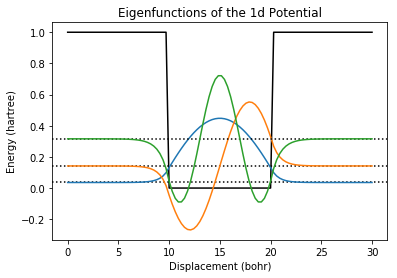

In [198]:
def finite_well(x,V_left=1,V_well=0,V_right=1,d_left=10,d_well=10,d_right=10):
    V = np.zeros(x.size,'d')
    for i in range(x.size):
        if x[i] < d_left: 
            V[i] = V_left
        elif x[i] > (d_left+d_well):
            V[i] = V_right
        else:
            V[i] = V_well
    return V
        
fw = Schrod1d(finite_well,start=0,end=30,npts=100)
fw.plot()

A triangular well:

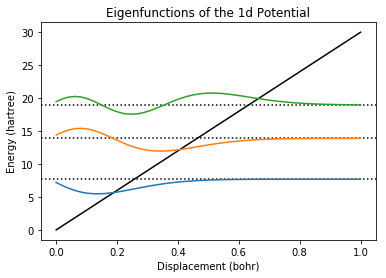

In [199]:
def triangular(x,F=30): return F*x

tw = Schrod1d(triangular,m=10)
tw.plot()

Or we can combine the two, making something like a semiconductor quantum well with a top gate:

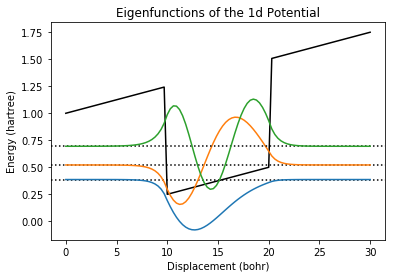

In [200]:
def tri_finite(x): return finite_well(x)+triangular(x,F=0.025)

tfw = Schrod1d(tri_finite,start=0,end=30,npts=100)
tfw.plot()

There's a lot of philosophy behind object oriented programming. Since I'm trying to focus on just the basics here, I won't go into them, but the internet is full of lots of resources on OO programming and theory. The best of this is contained in the [Design Patterns](http://en.wikipedia.org/wiki/Design_Patterns_(book)) book, which I highly recommend.

# IV. Speeding Python: Timeit, Profiling, Cython, SWIG, and PyPy

The first rule of speeding up your code is not to do it at all. As Donald Knuth said:

> "We should forget about small efficiencies, say about 97% of the time: premature optimization is the root of all evil."

The second rule of speeding up your code is to only do it if you really think you need to do it. Python has two tools to help with this process: a timing program called **timeit**, and a very good code profiler. We will discuss both of these tools in this section, as well as techniques to use to speed up your code once you know it's too slow.

## Timeit
**timeit** helps determine which of two similar routines is faster. Recall that some time ago we wrote a factorial routine, but also pointed out that Python had its own routine built into the math module. Is there any difference in the speed of the two? **timeit** helps us determine this. For example, **timeit** tells how long each method takes:

In [201]:
%timeit factorial(20)

90 ns ± 1.34 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


The little % sign that we have in front of the timeit call is an example of an IPython magic function, which we don't have time to go into here, but it's just some little extra mojo that IPython adds to the functions to make it run better in the IPython environment. You can read more about it in the [IPython tutorial](http://ipython.org/ipython-doc/dev/interactive/tutorial.html).

In any case, the timeit function runs 3 loops, and tells us that it took on the average of 583 ns to compute 20!. In contrast:

In [202]:
%timeit fact(20)

4.51 µs ± 79.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


the factorial function we wrote is about a factor of 10 slower. This is because the built-in factorial function is written in C code and called from Python, and the version we wrote is written in plain old Python. A Python program has a lot of stuff in it that make it nice to interact with, but all that friendliness slows down the code. In contrast, the C code is less friendly but more efficient. If you want speed with as little effort as possible, write your code in an easy to program language like Python, but dump the slow parts into a faster language like C, and call it from Python. We'll go through some tricks to do this in this section.

## Profiling

Profiling complements what **timeit** does by splitting the overall timing into the time spent in each function. It can give us a better understanding of what our program is really spending its time on.

Suppose we want to create a list of even numbers. Our first effort yields this:

In [203]:
def evens(n):
    "Return a list of even numbers below n"
    l = []
    for x in range(n):
        if x % 2 == 0:
            l.append(x)
    return l

Is this code fast enough? We find out by running the Python profiler on a longer run:

In [204]:
import cProfile
cProfile.run('evens(100000)')

         50004 function calls in 0.018 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.015    0.015    0.018    0.018 <ipython-input-203-0230bb536e33>:1(evens)
        1    0.000    0.000    0.018    0.018 <string>:1(<module>)
        1    0.000    0.000    0.018    0.018 {built-in method builtins.exec}
    50000    0.003    0.000    0.003    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




This looks okay, 0.05 seconds isn't a *huge* amount of time, but looking at the profiling shows that the **append** function is taking almost 20% of the time. Can we do better? Let's try a list comprehension.

In [205]:
def evens2(n):
    "Return a list of even numbers below n"
    return [x for x in range(n) if x % 2 == 0]

In [206]:
import cProfile
cProfile.run('evens2(100000)')

         5 function calls in 0.011 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.010    0.010 <ipython-input-205-7861f090b1c9>:1(evens2)
        1    0.010    0.010    0.010    0.010 <ipython-input-205-7861f090b1c9>:3(<listcomp>)
        1    0.001    0.001    0.011    0.011 <string>:1(<module>)
        1    0.000    0.000    0.011    0.011 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




By removing a small part of the code using a list comprehension, we've doubled the overall speed of the code! 

This is where profiling can be useful. Our code now runs faster by making trivial changes. We wouldn't have thought to look in these places had we not had access to easy profiling. Imagine what you would find in more complicated programs.

## Other Ways to Speed Python
When we compared the fact and factorial functions, above, we noted that C routines are often faster because they're more streamlined. Once we've determined that one routine is a bottleneck for the performance of a program, we can replace it with a faster version by writing it in C. This is called *extending* Python, and there's a [good section in the standard documents](http://docs.python.org/2/extending/extending.html). This can be a tedious process if you have many different routines to convert. Fortunately, there are several other options.

[Swig](http://swig.org/) (the simplified wrapper and interface generator) is a method to generate binding not only for Python but also for Matlab, Perl, Ruby, and other scripting languages. Swig can scan the header files of a C project and generate Python binding for it. Using Swig is substantially easier than writing the routines in C.

[Cython](http://www.cython.org/) is a C-extension language. You can start by compiling a Python routine into a shared object libraries that can be imported into faster versions of the routines. You can then add additional static typing and make other restrictions to further speed the code. Cython is generally easier than using Swig.

[PyPy](http://pypy.org/) is the easiest way of obtaining fast code. PyPy compiles Python to a subset of the Python language called RPython that can be efficiently compiled and optimized. Over a wide range of tests, PyPy is [roughly 6 times faster than the standard Python Distribution](http://speed.pypy.org/).

## Fun: Finding Primes

[Project Euler](http://projecteuler.net) is a site where programming puzzles are posed that might have interested Euler. [Problem 7](http://projecteuler.net/problem=7) asks the question:

> By listing the first six prime numbers: 2, 3, 5, 7, 11, and 13, we can see that the 6th prime is 13.
> 
> What is the 10,001st prime number?

To solve this we need a very long list of prime numbers. First we'll make a function that uses the Sieve of Erastothenes to generate all the primes less than n.

In [207]:
def primes(n):
    """\
    From python cookbook, returns a list of prime numbers from 2 to < n

    >>> primes(2)
    [2]
    >>> primes(10)
    [2, 3, 5, 7]
    """
    if n==2: return [2]
    elif n<2: return []
    s=list(range(3,n+1,2))
    mroot = n ** 0.5
    half=(n+1)//2-1
    i=0
    m=3
    while m <= mroot:
        if s[i]:
            j=(m*m-3)//2
            s[j]=0
            while j<half:
                s[j]=0
                j+=m
        i=i+1
        m=2*i+3
    return [2]+[x for x in s if x]

In [208]:
number_to_try = 1000000
list_of_primes = primes(number_to_try)
print(list_of_primes[10001])

104759


You might think that Python is a bad choice for something like this, but, in terms of time, it really doesn't take long:

In [209]:
cProfile.run('primes(1000000)')

         5 function calls in 0.163 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.142    0.142    0.159    0.159 <ipython-input-207-8ea5a6bb17c7>:1(primes)
        1    0.016    0.016    0.016    0.016 <ipython-input-207-8ea5a6bb17c7>:25(<listcomp>)
        1    0.004    0.004    0.163    0.163 <string>:1(<module>)
        1    0.000    0.000    0.163    0.163 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




Only takes 1/4 of a second to generate a list of all the primes below 1,000,000. It would be nice if we could use the same trick to get rid of the **range** function, but we actually need it, since we're using the object like a list, rather than like a counter as before.

# VII. References

## Learning Resources
* [Official Python Documentation](http://docs.python.org/2.7), including
    - [Python Tutorial](http://docs.python.org/2.7/tutorial)
    - [Python Language Reference](http://docs.python.org/2.7/reference)
* If you're interested in Python 3, the [Official Python 3 Docs are here](http://docs.python.org/3/).
* [IPython tutorial](http://ipython.org/ipython-doc/dev/interactive/tutorial.html).
* [Learn Python The Hard Way](http://learnpythonthehardway.org/book/)
* [Dive Into Python](http://www.diveintopython.net/), in particular if you're interested in Python 3.
* [Invent With Python](http://inventwithpython.com/), probably best for kids.
* [Python Functional Programming HOWTO](http://docs.python.org/2/howto/functional.html)
* [The Structure and Interpretation of Computer Programs](http://mitpress.mit.edu/sicp/full-text/book/book.html), written in Scheme, a Lisp dialect, but one of the best books on computer programming ever written.
* [Generator Tricks for Systems Programmers](http://www.dabeaz.com/generators/) Beazley's slides on just what generators can do for you.
* [Python Module of the Week](http://pymotw.com/2/contents.html) is a series going through in-depth analysis of the Python standard library in a very easy to understand way.

## Badass IPython Notebooks
* Rob Johansson's [excellent notebooks](http://jrjohansson.github.io/), including [Scientific Computing with Python](https://github.com/jrjohansson/scientific-python-lectures) and [Computational Quantum Physics with QuTiP](https://github.com/jrjohansson/qutip-lectures) lectures;
* [XKCD style graphs in matplotlib](http://nbviewer.ipython.org/url/jakevdp.github.com/downloads/notebooks/XKCD_plots.ipynb);
* [A collection of Notebooks for using IPython effectively](https://github.com/ipython/ipython/tree/master/examples/notebooks#a-collection-of-notebooks-for-using-ipython-effectively)
* [A gallery of interesting IPython Notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)
* [Cross-disciplinary computational analysis IPython Notebooks From Hadoop World 2012](https://github.com/invisibleroads/crosscompute-tutorials)
* [Quantites](http://nbviewer.ipython.org/urls/raw.github.com/tbekolay/pyconca2012/master/QuantitiesTutorial.ipynb) Units in Python.
    - [Another units module is here](http://www.southampton.ac.uk/~fangohr/blog/)

## Packages for Scientists
Important libraries

* [Python](http://www.python.org) version 2.7;
* [Numpy](http://www.numpy.org), the core numerical extensions for linear algebra and multidimensional arrays;
* [Scipy](http://www.scipy.org), additional libraries for scientific programming;
* [Matplotlib](http://matplotlib.sf.net), excellent plotting and graphing libraries;
* [IPython](http://ipython.org), with the additional libraries required for the notebook interface.
* [Sympy](http://sympy.org), symbolic math in Python
* [Pandas](http://pandas.pydata.org/) library for big data in Python

Other packages of interest

* [PyQuante](http://pyquante.sf.net) Python Quantum Chemistry
* [QuTiP](https://code.google.com/p/qutip/) Quantum Toolbox in Python
* Konrad Hinsen's [Scientific Python](http://dirac.cnrs-orleans.fr/plone/software/scientificpython/) and [MMTK](http://dirac.cnrs-orleans.fr/MMTK/)
* [Atomic Simulation Environment](https://wiki.fysik.dtu.dk/ase/)


## Cool Stuff
* [Moin Moin](http://moinmo.in/), a wiki written in Python
* [Project Euler](http://projecteuler.net/), programming problems that would (?) have interested Euler. Python is one of the most commonly used languages there.

# VI. Acknowledgements
Thanks to [Rick Muller](http://www.cs.sandia.gov/~rmuller/) for original content. Muller's content for Python2 is upgraded for Python3.

This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). The work is offered for free, with the hope that it will be useful. Please consider making a donation to the [John Hunter Memorial Fund](http://numfocus.org/johnhunter/).

![CC BY SA](http://i.creativecommons.org/l/by-sa/3.0/88x31.png)